# Introduction
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), we can build a model that can predict wether or nor a borrower will pay back their loan

The "loan_status" column contains our label.

### Importing libraries

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=1.5)
pd.set_option('display.max_colwidth',None)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Reading data

In [2]:
data0=pd.read_csv('lending_club_loan_two.csv')

In [3]:
data0.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
info=pd.read_csv("lending_club_info.csv")

In [5]:
info

,LoanStatNew,Description
0,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if the loan originates.
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when applying for the loan.*
7,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
8,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"
9,annual_inc,The self-reported annual income provided by the borrower during registration.


In [6]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# EDA

## Target column

In [7]:
data1=data0.copy()

In [8]:
data1.loan_status.head()

0     Fully Paid
1     Fully Paid
2     Fully Paid
3     Fully Paid
4    Charged Off
Name: loan_status, dtype: object

### Countplot of target column

<AxesSubplot:xlabel='loan_status', ylabel='count'>

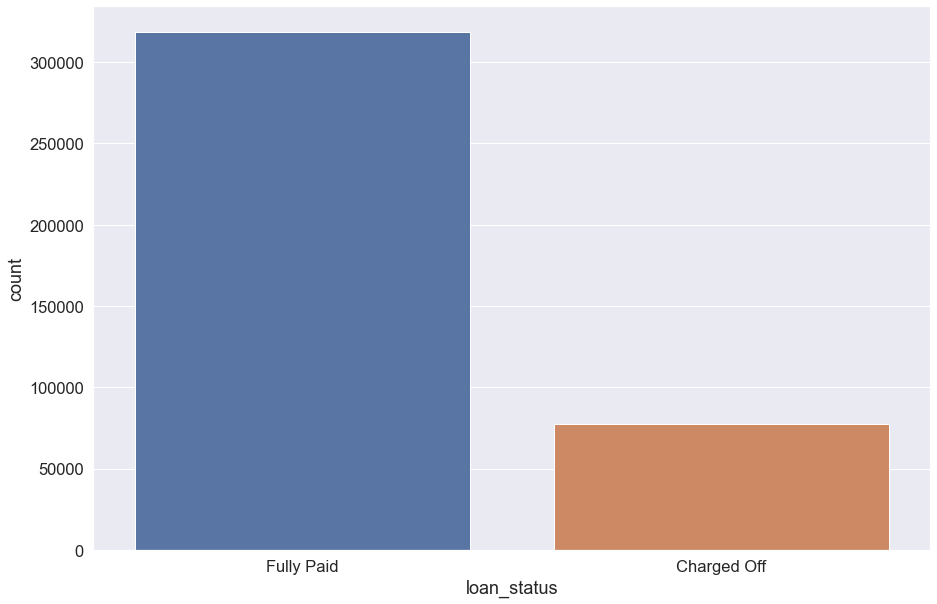

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(data=data1,x='loan_status')

**Unbalanced label distribution**

### Encoding target column

In [10]:
data1.loan_status=pd.get_dummies(data1.loan_status,drop_first=True)

In [11]:
data1.loan_status.head()

0    1
1    1
2    1
3    1
4    0
Name: loan_status, dtype: uint8

## Missing values

In [12]:
nulls=data1.isna().sum()
nulls

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

### Percentage missing

In [13]:
nulls[nulls.values!=0]/len(data1)*100

emp_title               5.789208
emp_length              4.621115
title                   0.443148
revol_util              0.069692
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
dtype: float64

## Correlations

In [14]:
data1.corr().loan_status.sort_values()[:-1]

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
Name: loan_status, dtype: float64

<AxesSubplot:>

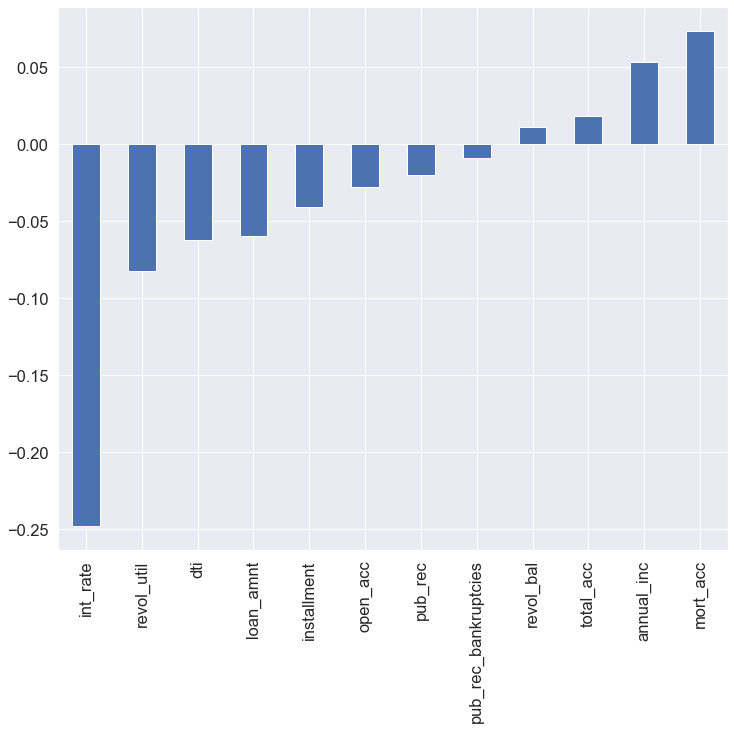

In [15]:
plt.figure(figsize=(12,10))
data1.corr().loan_status.sort_values()[:-1].plot(kind='bar')

In [16]:
correl=pd.DataFrame(data1.corr().loan_status.sort_values()[:-1]).reset_index()

In [17]:
correl

,index,loan_status
0,int_rate,-0.247758
1,revol_util,-0.082373
2,dti,-0.062413
3,loan_amnt,-0.059836
4,installment,-0.041082
5,open_acc,-0.028012
6,pub_rec,-0.019933
7,pub_rec_bankruptcies,-0.009383
8,revol_bal,0.010892
9,total_acc,0.017893


<AxesSubplot:xlabel='loan_status', ylabel='index'>

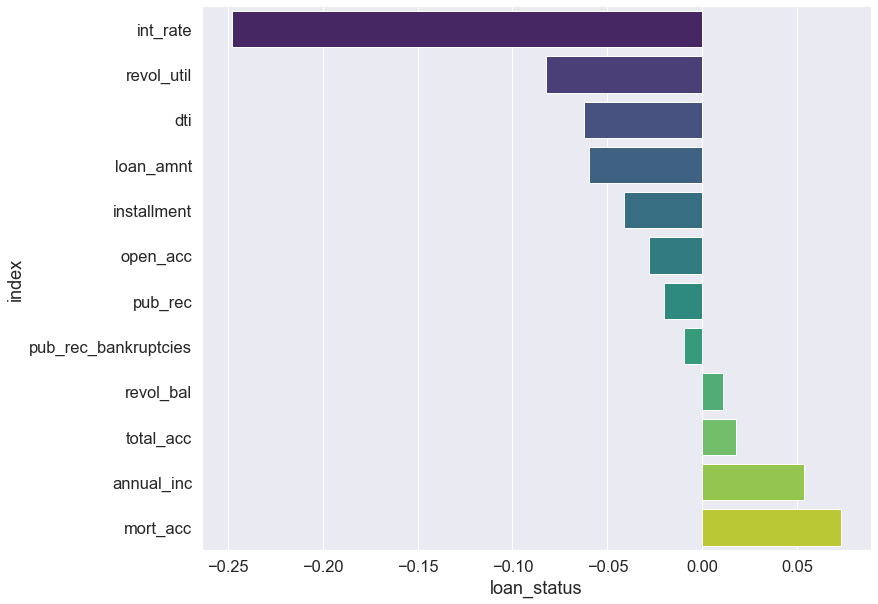

In [18]:
plt.figure(figsize=(12,10))
sns.barplot(y='index',x='loan_status',data=correl,palette='viridis')

**int_rate is the most negatively correlated with label at ~-0.25**

### int_rate

In [19]:
info[info.LoanStatNew=='int_rate'].Description

2    Interest Rate on the loan
Name: Description, dtype: object

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

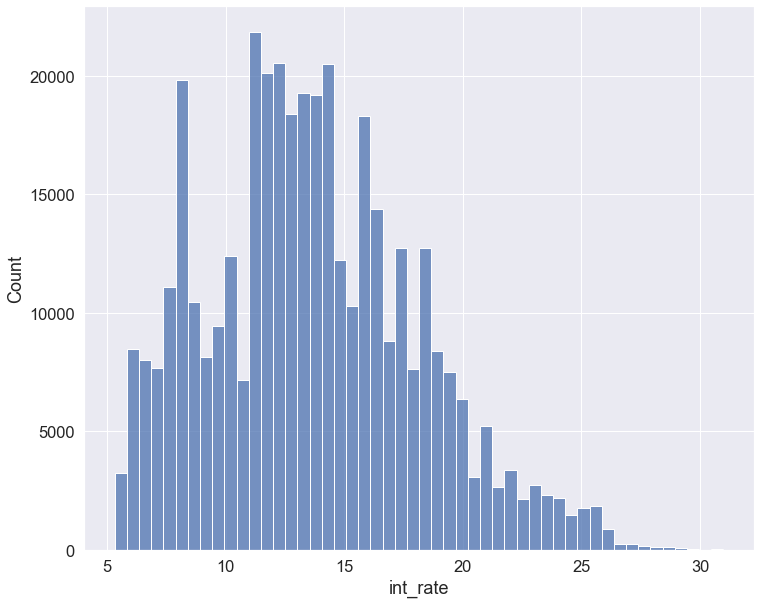

In [20]:
plt.figure(figsize=(12,10))
sns.histplot(data1.int_rate,bins=50)

#### Bivariate plot

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

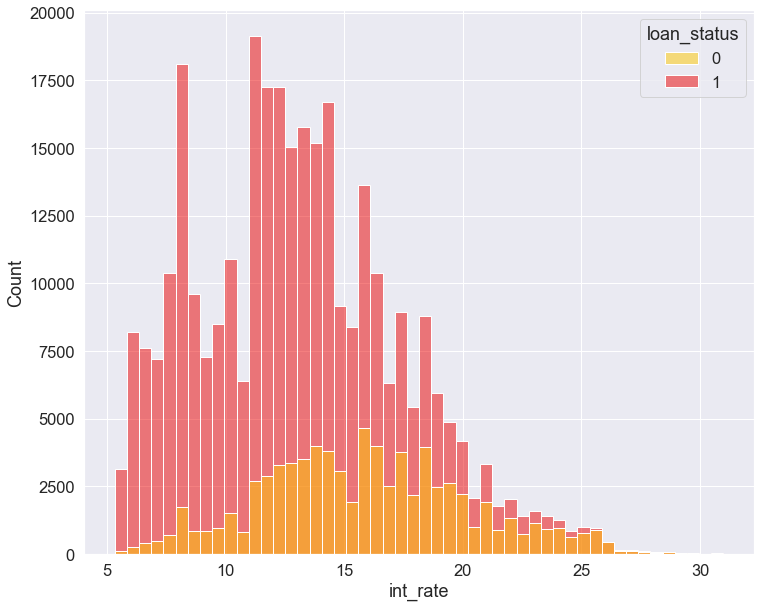

In [21]:
plt.figure(figsize=(12,10))
sns.histplot(data=data1,x='int_rate',bins=50,hue='loan_status',palette='hot_r')

**More chance of Loan repayment when interest rates were lower**

## Collinearity

<AxesSubplot:>

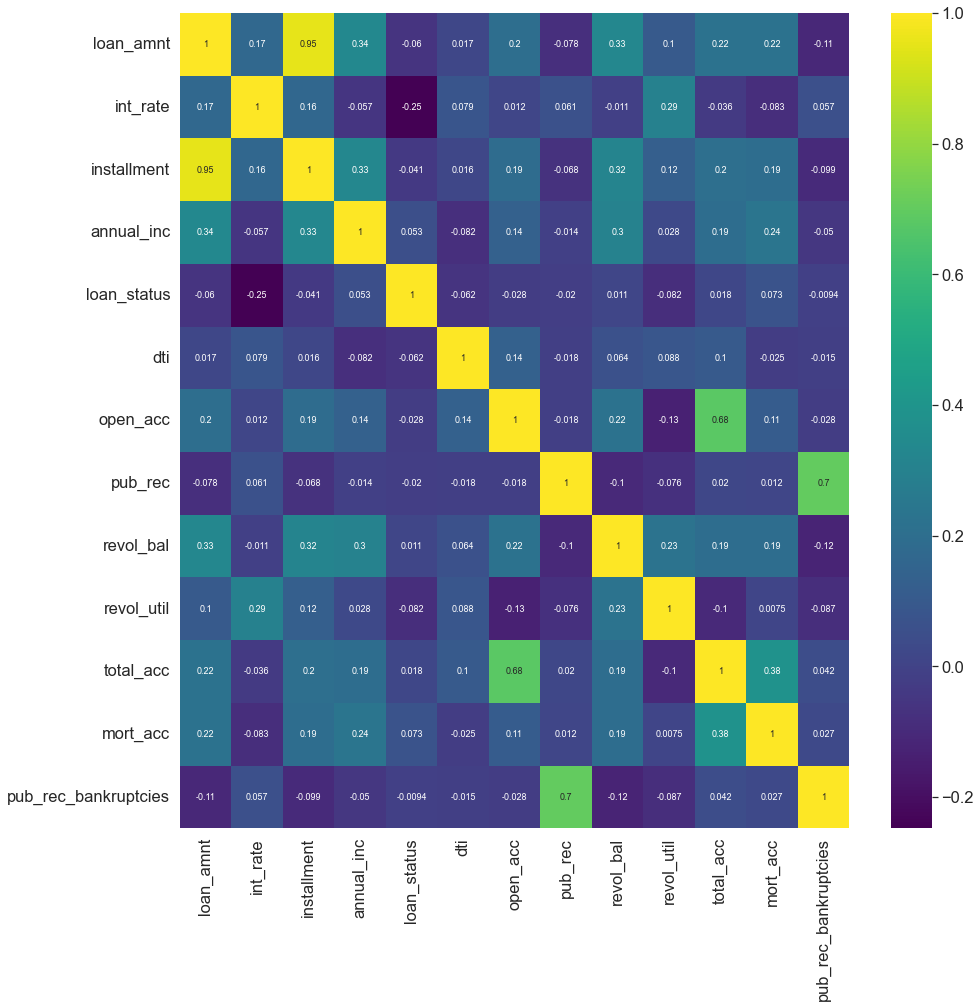

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(data1.corr(),cmap='viridis',annot=True,annot_kws={'size':9})

### installment and loan_amnt is highly correlated at 0.95

#### installment

In [23]:
info[info.LoanStatNew=='installment'].Description

3    The monthly payment owed by the borrower if the loan originates.
Name: Description, dtype: object

<AxesSubplot:xlabel='installment', ylabel='Count'>

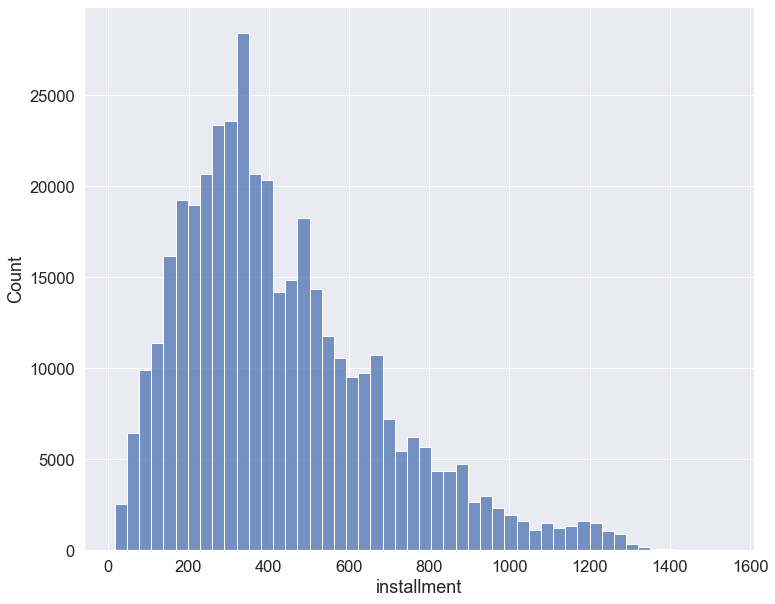

In [24]:
plt.figure(figsize=(12,10))
sns.histplot(data1.installment,bins=50)

<AxesSubplot:xlabel='installment', ylabel='Count'>

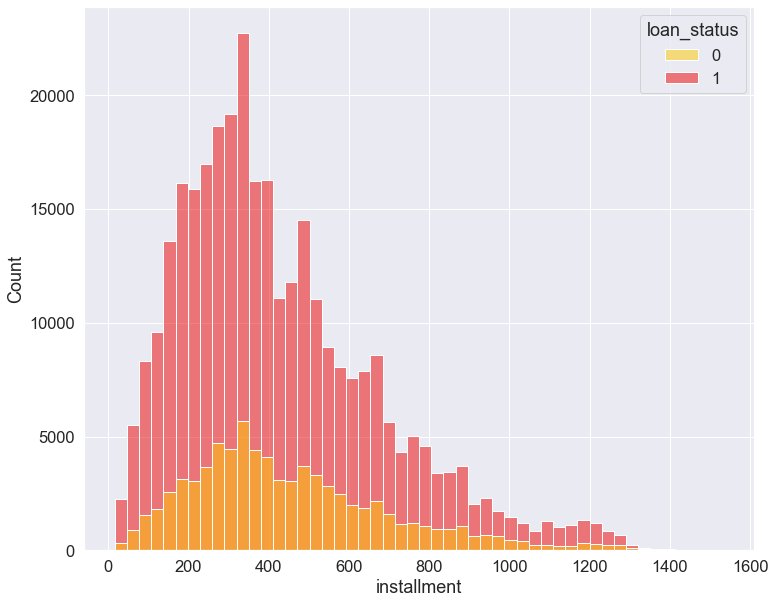

In [25]:
plt.figure(figsize=(12,10))
sns.histplot(data=data1,x='installment',bins=50,hue='loan_status',palette='hot_r')

In [26]:
data1.installment.describe()

count    396030.000000
mean        431.849698
std         250.727790
min          16.080000
25%         250.330000
50%         375.430000
75%         567.300000
max        1533.810000
Name: installment, dtype: float64

#### loan_amnt

In [27]:
info[info.LoanStatNew=='loan_amnt'].Description

0    The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
Name: Description, dtype: object

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

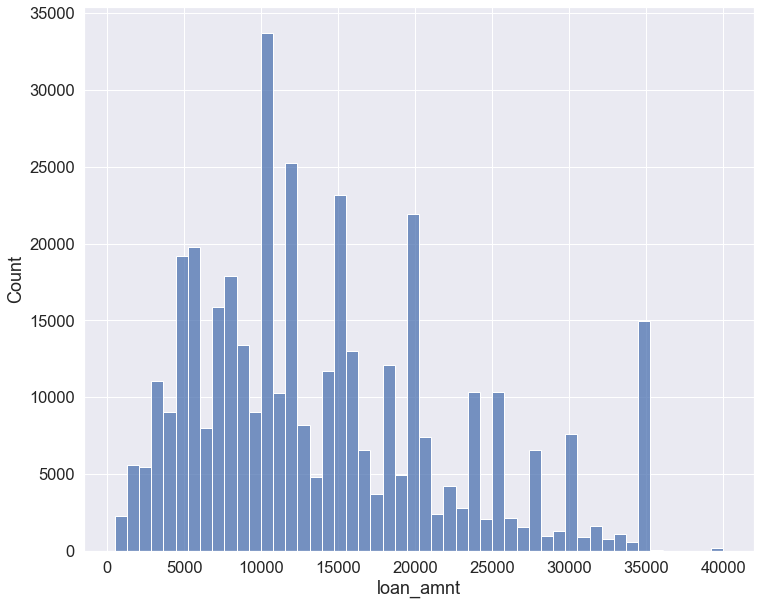

In [28]:
plt.figure(figsize=(12,10))
sns.histplot(data1.loan_amnt,bins=50)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

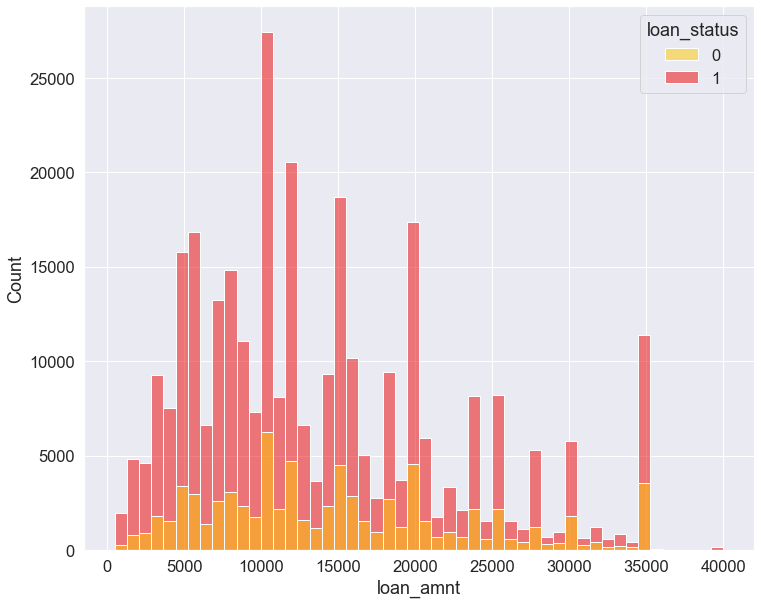

In [29]:
plt.figure(figsize=(12,10))
sns.histplot(data=data1,x='loan_amnt',bins=50,hue='loan_status',palette='hot_r')


In [30]:
data1.loan_amnt.describe()

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

#### installment is directly correlated to the loan_amnt as it is usually a percentage of loan amount

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

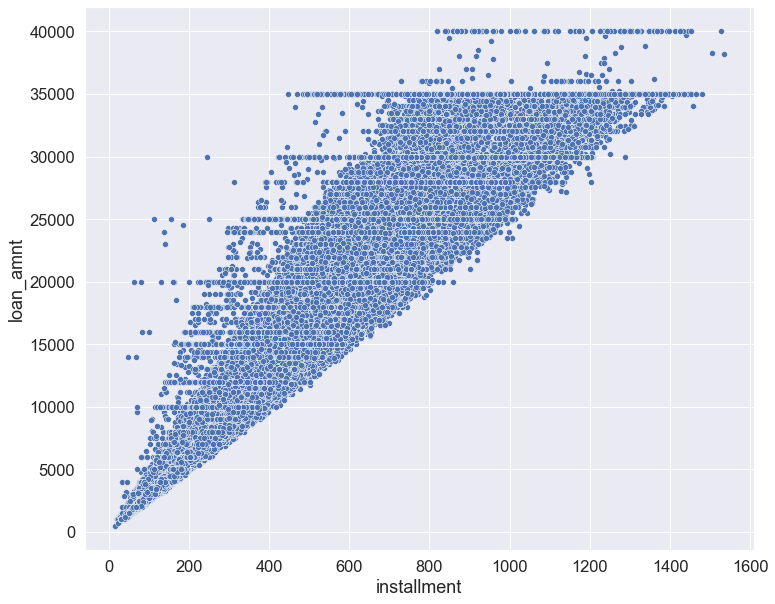

In [31]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='installment',y='loan_amnt',data=data1,palette='viridis')

**Trivariate plot**

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

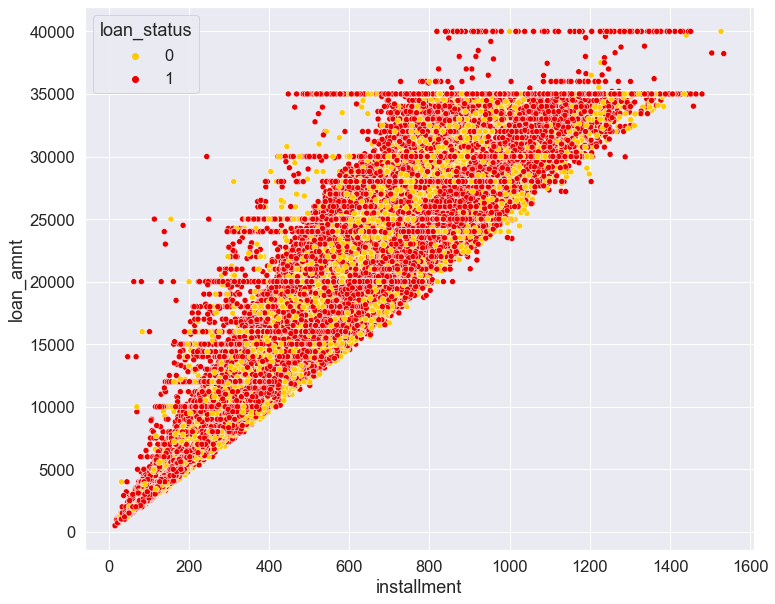

In [32]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='installment',y='loan_amnt',data=data1,palette='hot_r',hue='loan_status')

### pub_rec and pub_rec_bankruptcies are correlated at 0.7

#### pub_rec

In [33]:
info[info.LoanStatNew=='pub_rec'].Description

20    Number of derogatory public records
Name: Description, dtype: object

In [34]:
data1.pub_rec.describe()

count    396030.000000
mean          0.178191
std           0.530671
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64

<AxesSubplot:xlabel='pub_rec', ylabel='Count'>

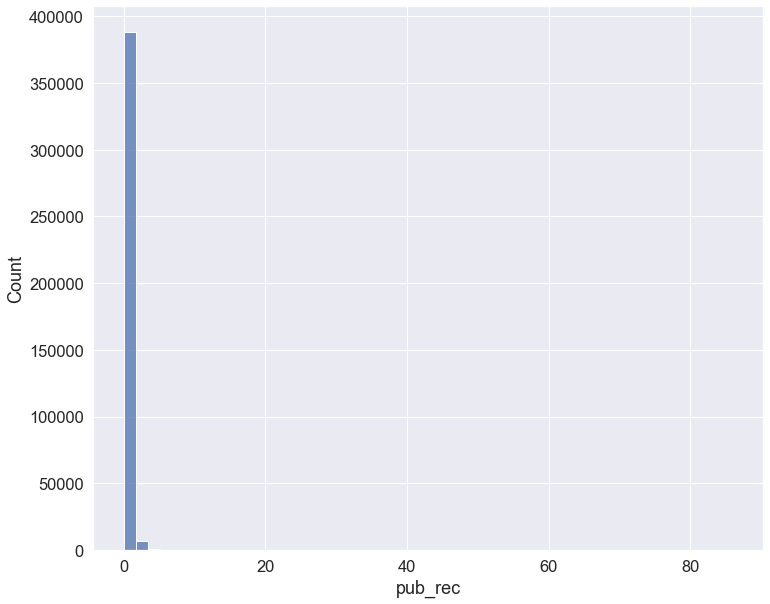

In [35]:
plt.figure(figsize=(12,10))
sns.histplot(data1.pub_rec,bins=50)

In [36]:
data1.pub_rec.value_counts()

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: pub_rec, dtype: int64

In [37]:
data1[data1.pub_rec<7].pub_rec.value_counts()

0.0    338272
1.0     49739
2.0      5476
3.0      1521
4.0       527
5.0       237
6.0       122
Name: pub_rec, dtype: int64

In [38]:
len(data1[data1.pub_rec<4])/len(data1)*100

99.7419387420145

**Histplot of pub_rec less than 4 (99.74% of data)**

<AxesSubplot:xlabel='pub_rec', ylabel='Count'>

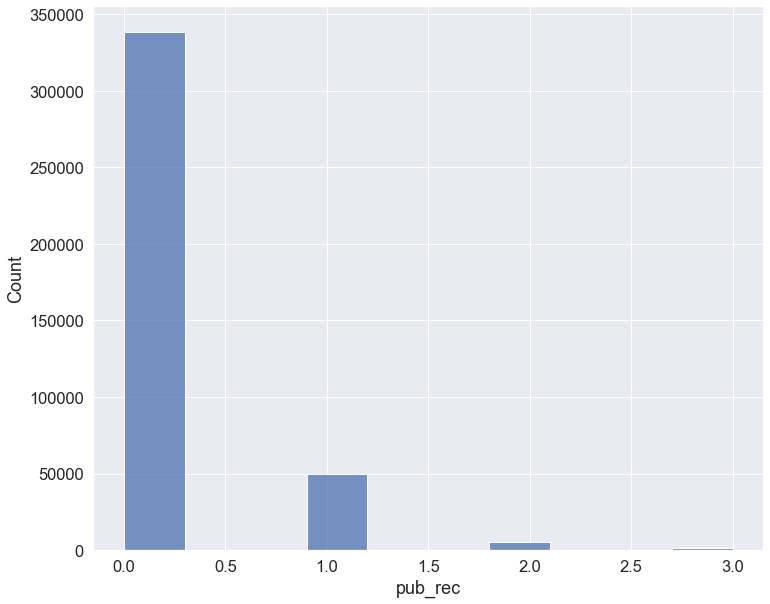

In [39]:
plt.figure(figsize=(12,10))
sns.histplot(data1[data1.pub_rec<4].pub_rec,bins=10)

**Bivariate plot**

<AxesSubplot:xlabel='pub_rec', ylabel='Count'>

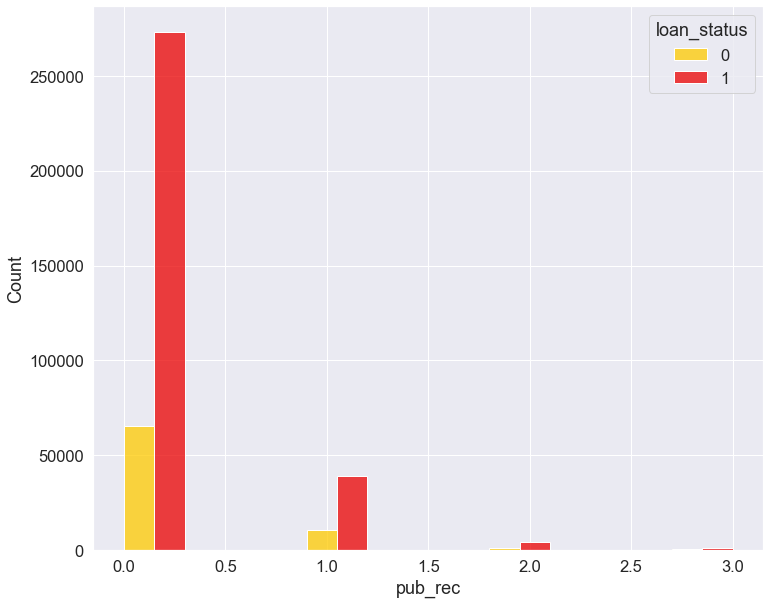

In [40]:
plt.figure(figsize=(12,10))
sns.histplot(data1[data1.pub_rec<4],x='pub_rec',hue='loan_status',palette='hot_r',bins=10,multiple='dodge')

#### pub_rec_bankruptcies

In [41]:
info[info.LoanStatNew=='pub_rec_bankruptcies'].Description

27    Number of public record bankruptcies
Name: Description, dtype: object

In [42]:
data1.pub_rec_bankruptcies.describe()

count    395495.000000
mean          0.121648
std           0.356174
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: pub_rec_bankruptcies, dtype: float64

In [43]:
data1.pub_rec_bankruptcies.value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Count'>

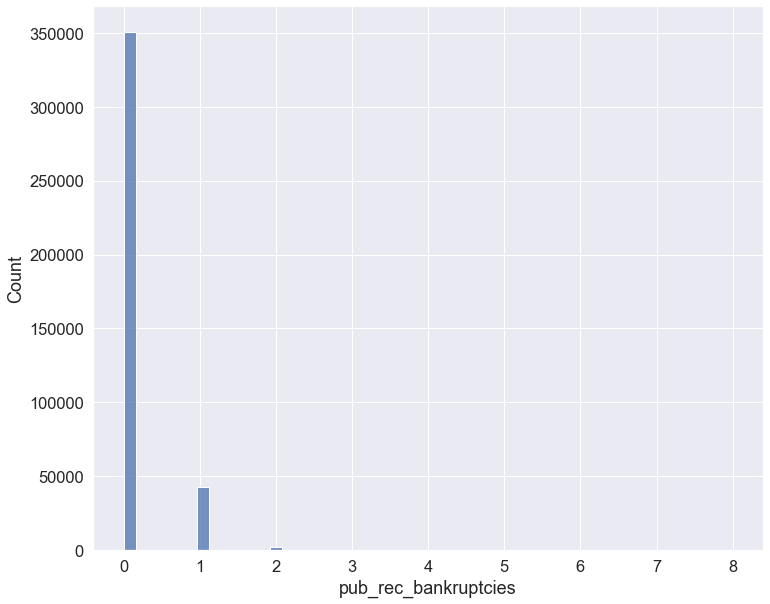

In [44]:
plt.figure(figsize=(12,10))
sns.histplot(data1.pub_rec_bankruptcies,bins=50)

**Bivariate plot**

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Count'>

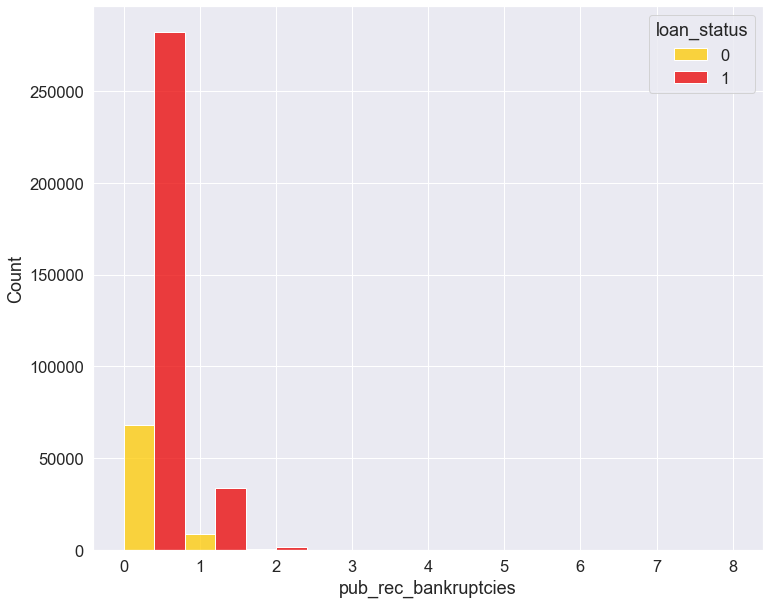

In [45]:
plt.figure(figsize=(12,10))
sns.histplot(data1,x='pub_rec_bankruptcies',hue='loan_status',palette='hot_r',bins=10,multiple='dodge')

#### Both features are indicative of past records of consumer. Hence correlated

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='pub_rec'>

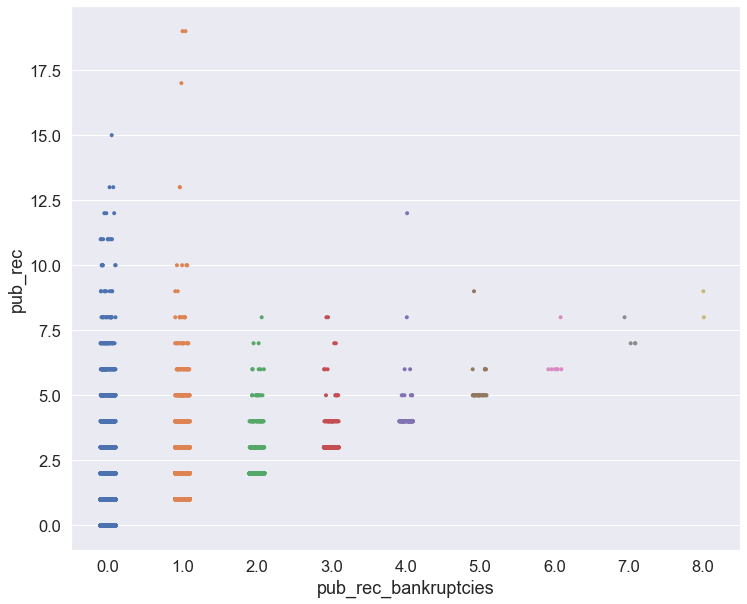

In [46]:
plt.figure(figsize=(12,10))
sns.stripplot(x='pub_rec_bankruptcies',y='pub_rec',data=data1[data1.pub_rec<20],size=4)

**Trivariate plot**

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='pub_rec'>

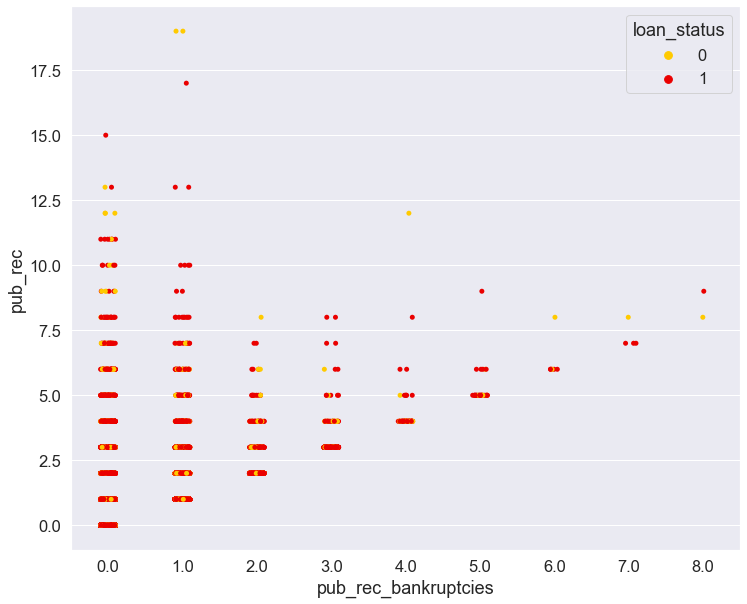

In [47]:
plt.figure(figsize=(12,10))
sns.stripplot(x='pub_rec_bankruptcies',y='pub_rec',data=data1[data1.pub_rec<20],palette='hot_r',hue='loan_status')

### open_acc and total_acc are correlated at 0.68

#### open_acc

In [48]:
info[info.LoanStatNew=='open_acc'].Description

19    The number of open credit lines in the borrower's credit file.
Name: Description, dtype: object

In [49]:
data1.open_acc.describe()

count    396030.000000
mean         11.311153
std           5.137649
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          90.000000
Name: open_acc, dtype: float64

<AxesSubplot:xlabel='open_acc', ylabel='Count'>

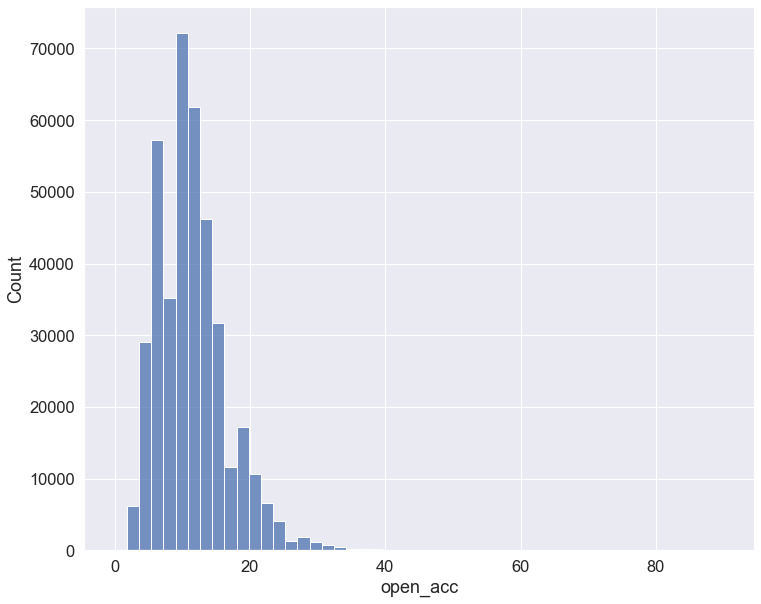

In [50]:
plt.figure(figsize=(12,10))
sns.histplot(data1.open_acc,bins=50)

<AxesSubplot:xlabel='open_acc', ylabel='Count'>

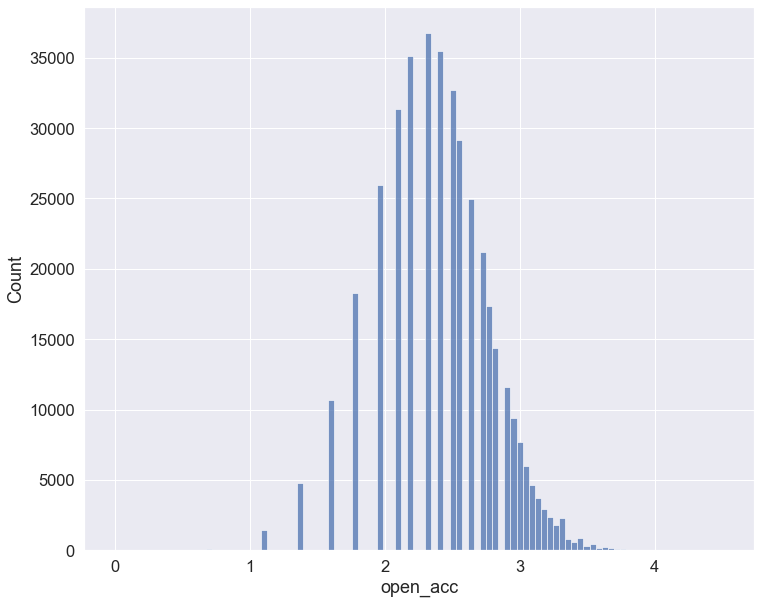

In [51]:
plt.figure(figsize=(12,10))
sns.histplot(np.log1p(data1.open_acc),bins=100)

**Bivariate plot of open_acc**

<AxesSubplot:xlabel='open_acc', ylabel='Count'>

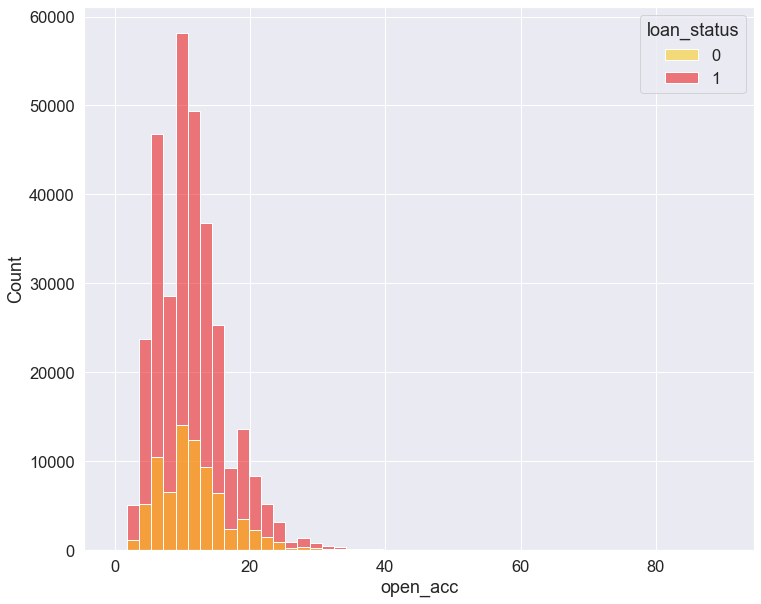

In [52]:
plt.figure(figsize=(12,10))
sns.histplot(data1,x='open_acc',bins=50,hue='loan_status',palette='hot_r')

#### total_acc

In [53]:
info[info.LoanStatNew=='total_acc'].Description

23    The total number of credit lines currently in the borrower's credit file
Name: Description, dtype: object

In [54]:
data1.total_acc.describe()

count    396030.000000
mean         25.414744
std          11.886991
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         151.000000
Name: total_acc, dtype: float64

<AxesSubplot:xlabel='total_acc', ylabel='Count'>

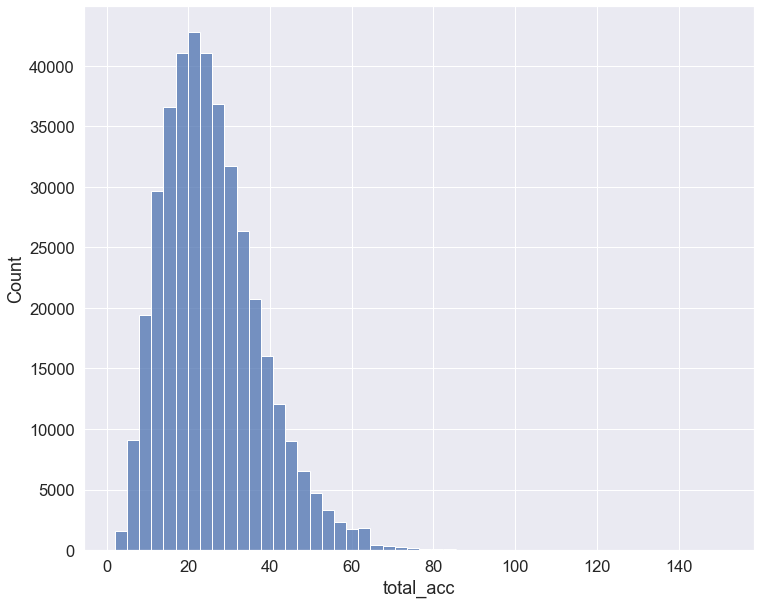

In [55]:
plt.figure(figsize=(12,10))
sns.histplot(data1.total_acc,bins=50)

<AxesSubplot:xlabel='total_acc', ylabel='Count'>

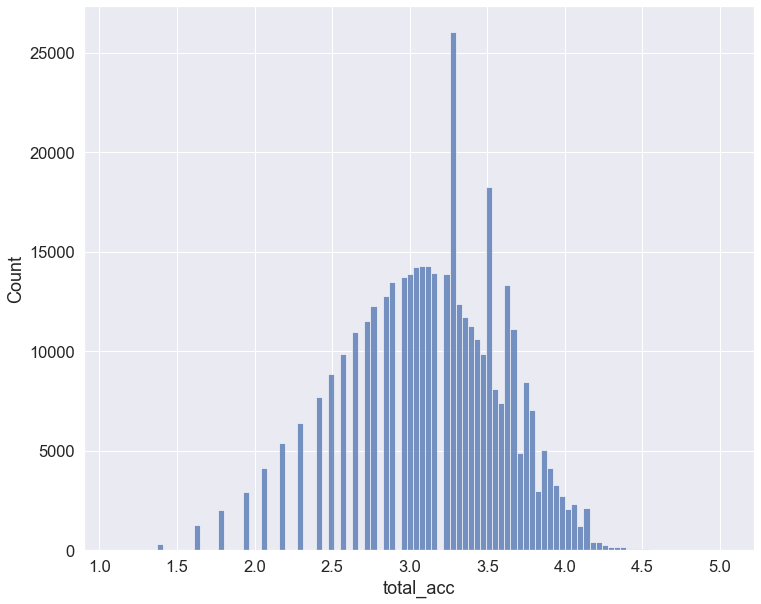

In [56]:
plt.figure(figsize=(12,10))
sns.histplot(np.log1p(data1.total_acc),bins=100)

**Bivariate plot of total_acc**

<AxesSubplot:xlabel='total_acc', ylabel='Count'>

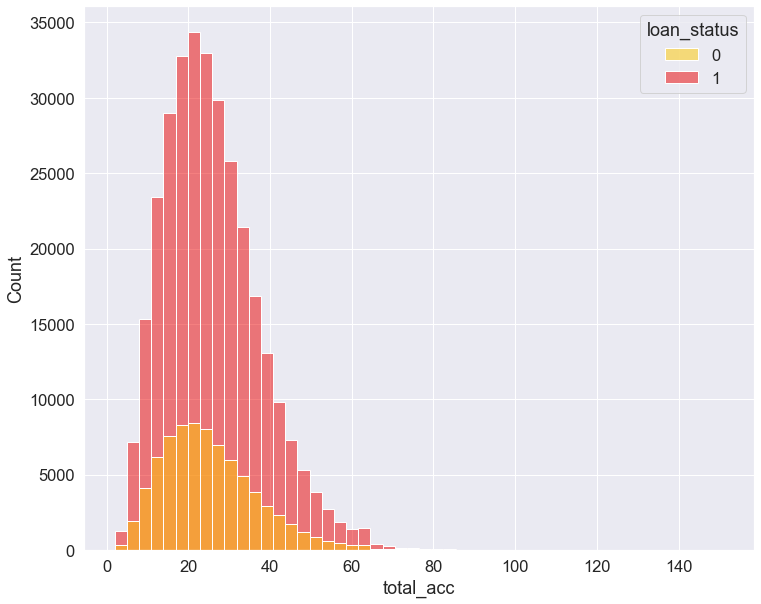

In [57]:
plt.figure(figsize=(12,10))
sns.histplot(data1,x='total_acc',bins=50,hue='loan_status',palette='hot_r')

#### One feature is a subset of another. Hence correlated

<AxesSubplot:xlabel='open_acc', ylabel='total_acc'>

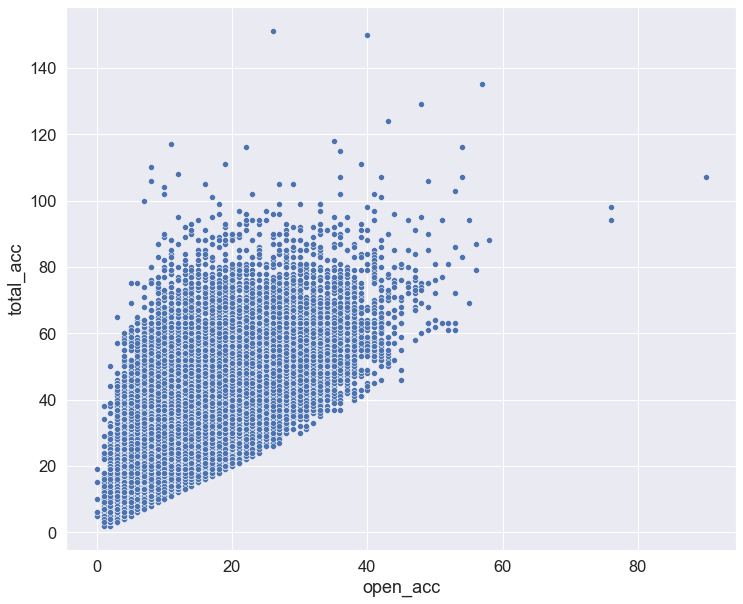

In [58]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='open_acc',y='total_acc',data=data1,palette='viridis')

**Trivariate plot**

<AxesSubplot:xlabel='open_acc', ylabel='total_acc'>

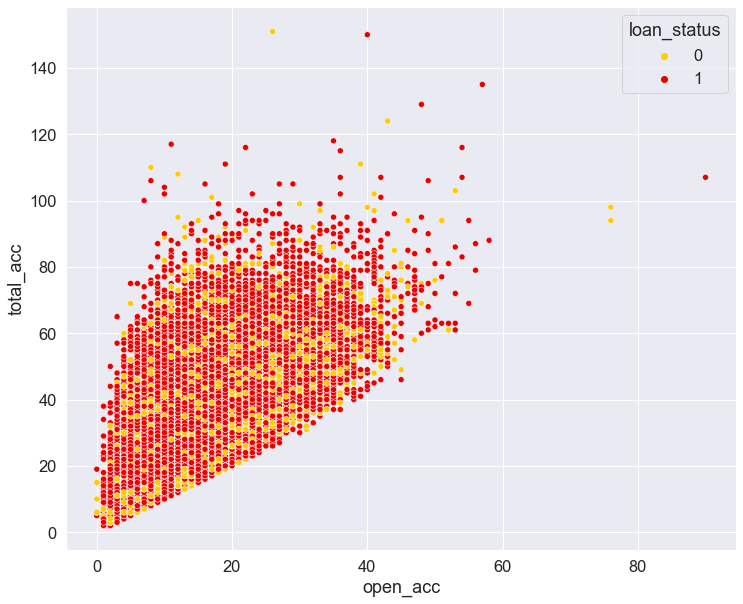

In [59]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='open_acc',y='total_acc',data=data1,palette='hot_r',hue='loan_status')

## Other numerical features

In [60]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  uint8  
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [61]:
data1.select_dtypes('float').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   annual_inc            396030 non-null  float64
 4   dti                   396030 non-null  float64
 5   open_acc              396030 non-null  float64
 6   pub_rec               396030 non-null  float64
 7   revol_bal             396030 non-null  float64
 8   revol_util            395754 non-null  float64
 9   total_acc             396030 non-null  float64
 10  mort_acc              358235 non-null  float64
 11  pub_rec_bankruptcies  395495 non-null  float64
dtypes: float64(12)
memory usage: 36.3 MB


### annual_inc

In [62]:
info[info.LoanStatNew=='annual_inc'].Description

9    The self-reported annual income provided by the borrower during registration.
Name: Description, dtype: object

In [63]:
data1.annual_inc.describe()

count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

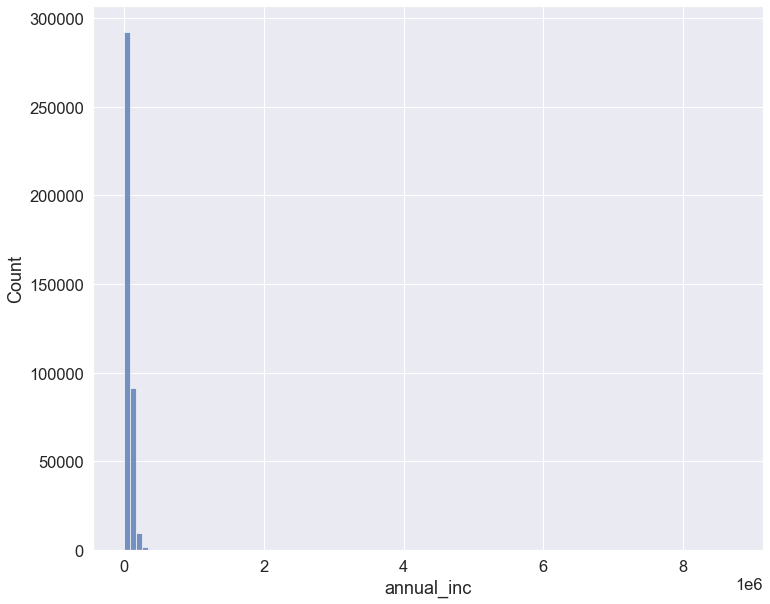

In [64]:
plt.figure(figsize=(12,10))
sns.histplot(data1.annual_inc,bins=100)

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

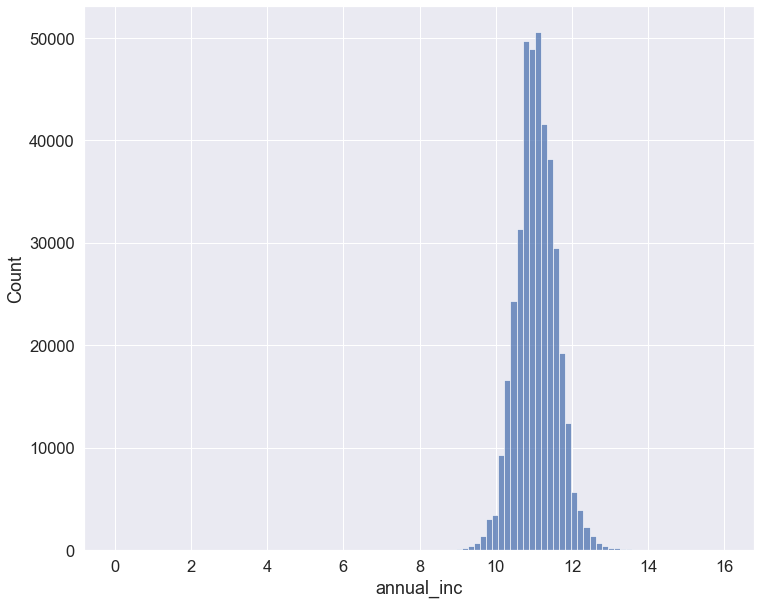

In [65]:
plt.figure(figsize=(12,10))
sns.histplot(np.log1p(data1.annual_inc),bins=100)

In [66]:
data1[data1.annual_inc<200000].annual_inc.value_counts()

60000.00     15313
50000.00     13303
65000.00     11333
70000.00     10674
40000.00     10629
             ...  
111286.00        1
49577.60         1
49551.00         1
69779.00         1
31789.88         1
Name: annual_inc, Length: 26501, dtype: int64

In [67]:
len(data1[data1.annual_inc<300000])/len(data1)*100

99.42403353281317

#### Histplot of annual_inc less than 300000 (99.42% of data)

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

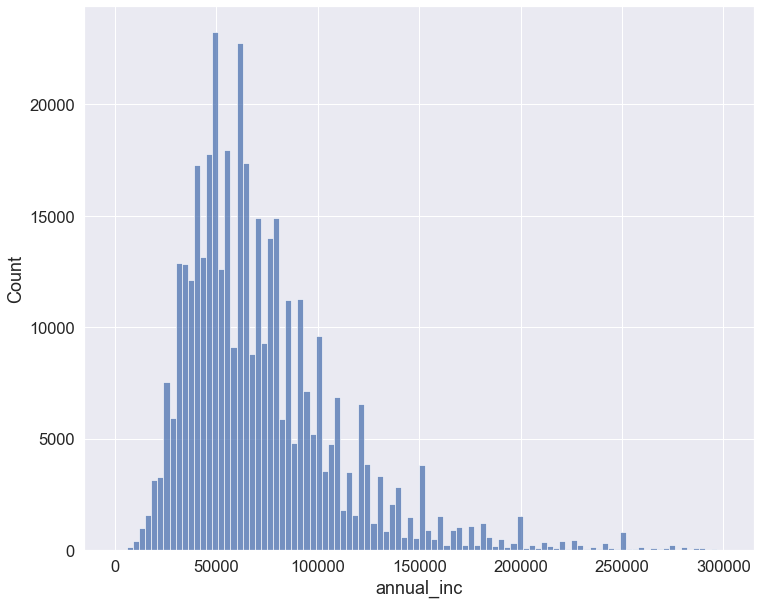

In [68]:
plt.figure(figsize=(12,10))
sns.histplot(data1[data1.annual_inc<300000].annual_inc,bins=100)

**Bivariate plot**

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

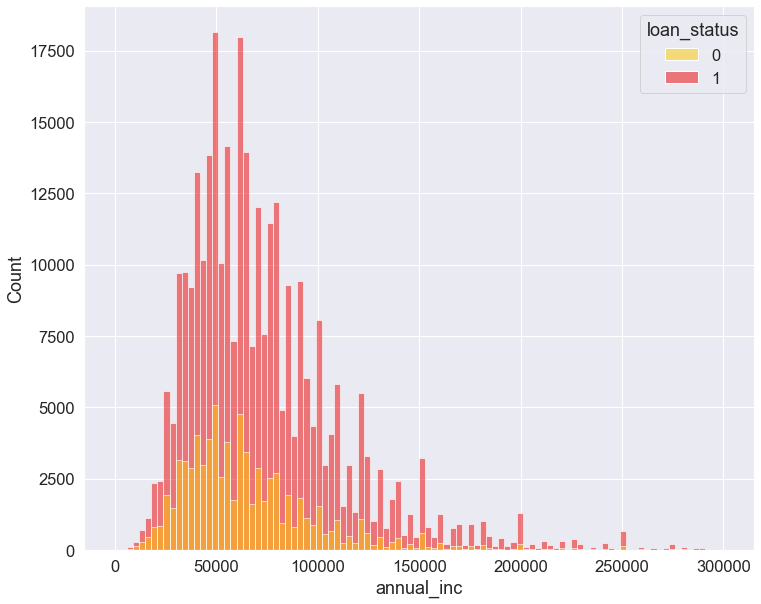

In [69]:
plt.figure(figsize=(12,10))
sns.histplot(data1[data1.annual_inc<300000],x='annual_inc',hue='loan_status',bins=100,palette='hot_r')

### dti

In [70]:
info[info.LoanStatNew=='dti'].Description

17    A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
Name: Description, dtype: object

In [71]:
data1.dti.describe()

count    396030.000000
mean         17.379514
std          18.019092
min           0.000000
25%          11.280000
50%          16.910000
75%          22.980000
max        9999.000000
Name: dti, dtype: float64

<AxesSubplot:xlabel='dti', ylabel='Count'>

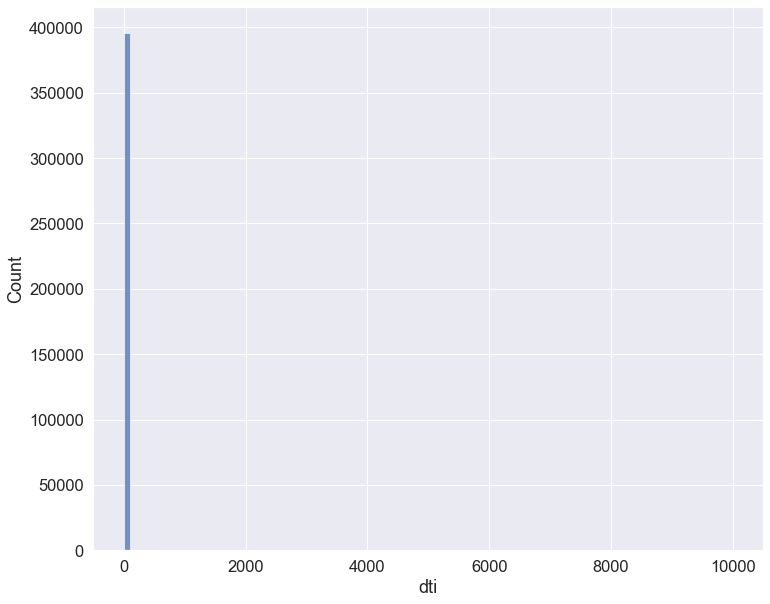

In [72]:
plt.figure(figsize=(12,10))
sns.histplot(data1.dti,bins=100)

<AxesSubplot:xlabel='dti', ylabel='Count'>

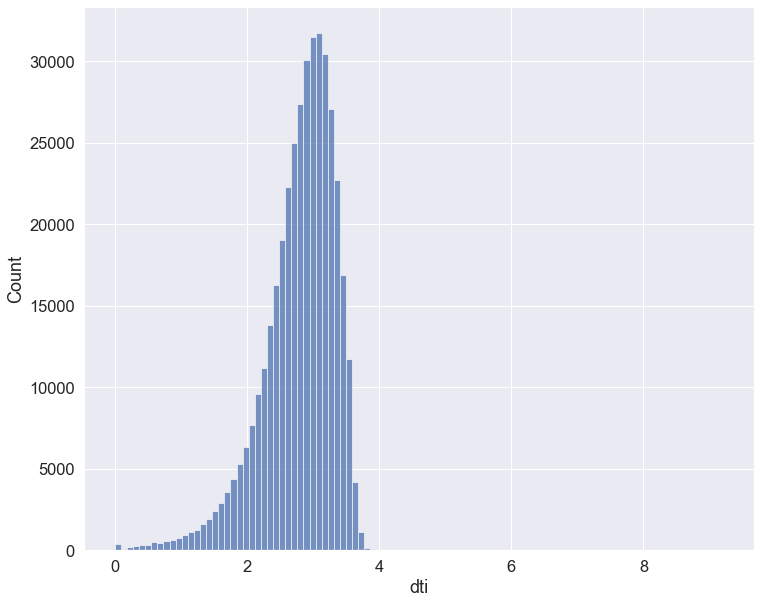

In [73]:
plt.figure(figsize=(12,10))
sns.histplot(np.log1p(data1.dti),bins=100)

In [74]:
data1[data1.dti<50].dti.describe()

count    395995.000000
mean         17.344702
std           8.119597
min           0.000000
25%          11.280000
50%          16.900000
75%          22.980000
max          49.830000
Name: dti, dtype: float64

In [75]:
len(data1[data1.dti<50])/len(data1)*100

99.99116228568543

#### Histplot of dti less than 50 (99.99% of data)

<AxesSubplot:xlabel='dti', ylabel='Count'>

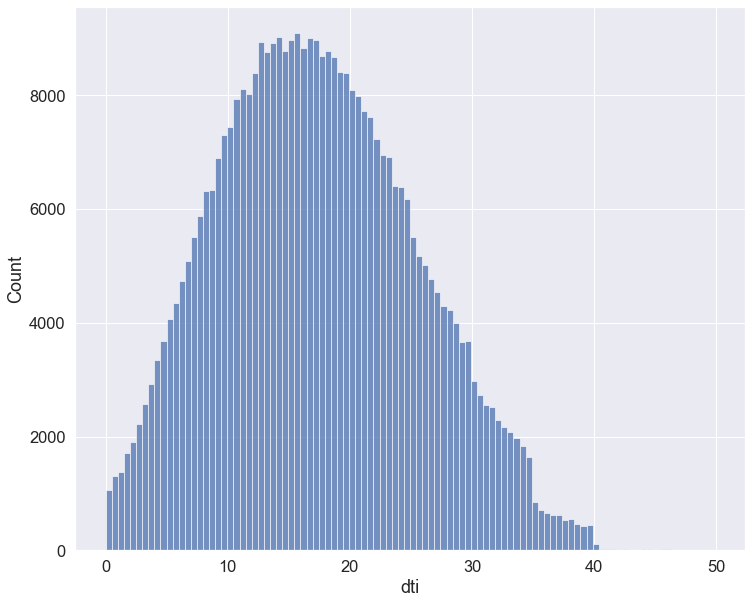

In [76]:
plt.figure(figsize=(12,10))
sns.histplot(data1[data1.dti<50].dti,bins=100)

**Bivariate plot**

<AxesSubplot:xlabel='dti', ylabel='Count'>

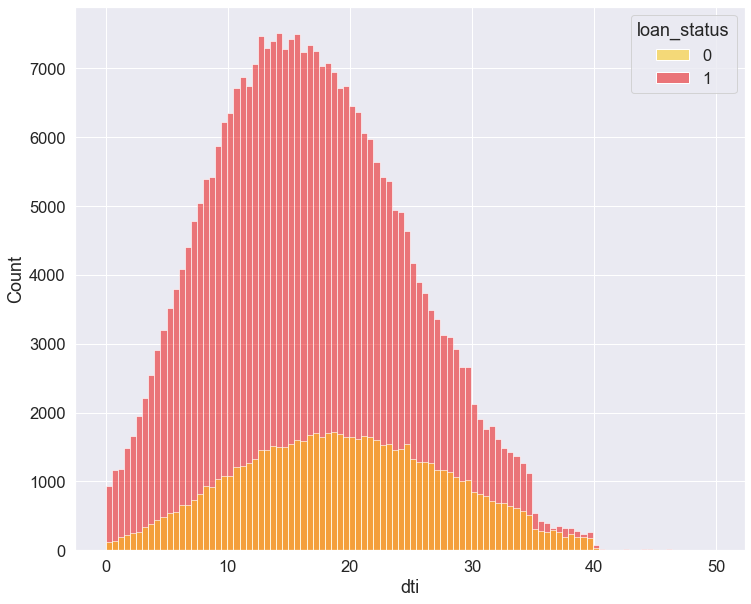

In [77]:
plt.figure(figsize=(12,10))
sns.histplot(data1[data1.dti<50],x='dti',hue='loan_status',bins=100,palette='hot_r')

### revol_bal

In [78]:
info[info.LoanStatNew=='revol_bal'].Description

21    Total credit revolving balance
Name: Description, dtype: object

In [79]:
data1.revol_bal.describe()

count    3.960300e+05
mean     1.584454e+04
std      2.059184e+04
min      0.000000e+00
25%      6.025000e+03
50%      1.118100e+04
75%      1.962000e+04
max      1.743266e+06
Name: revol_bal, dtype: float64

<AxesSubplot:xlabel='revol_bal', ylabel='Count'>

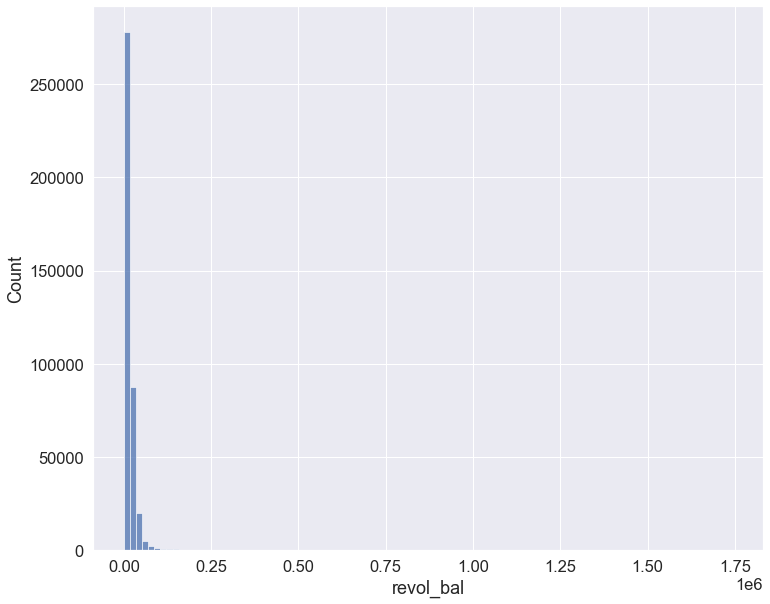

In [80]:
plt.figure(figsize=(12,10))
sns.histplot(data1.revol_bal,bins=100)

<AxesSubplot:xlabel='revol_bal', ylabel='Count'>

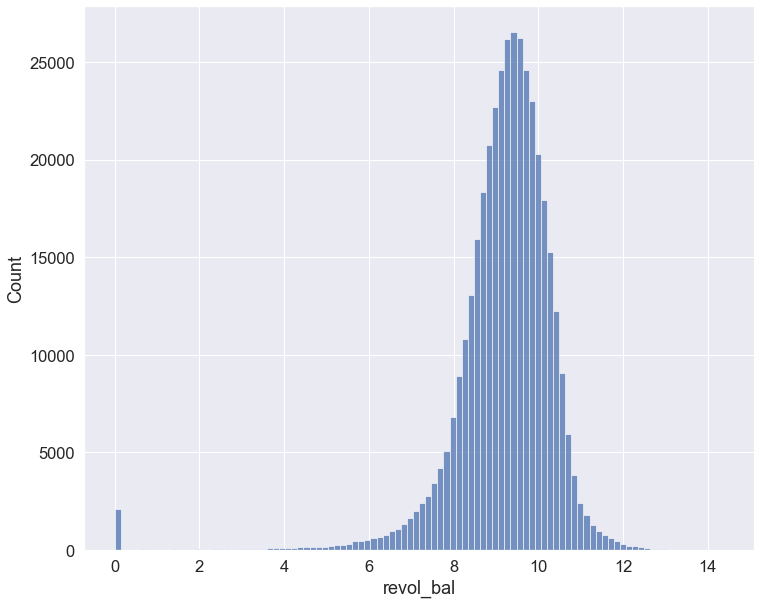

In [81]:
plt.figure(figsize=(12,10))
sns.histplot(np.log1p(data1.revol_bal),bins=100)

In [82]:
len(data1[data1.revol_bal<100000])/len(data1)*100

99.25308688735703

**Null values**

In [83]:
data1.revol_util.isna().sum()

276

In [84]:
sum(data1.revol_util.notna())

395754

In [85]:
len(data1)

396030

In [86]:
len(data1[data1.revol_bal<100000])/sum(data1.revol_util.notna())*100

99.32230628117466

#### Histplot of revol_bal<100000 (99.32% of data)

<AxesSubplot:xlabel='revol_bal', ylabel='Count'>

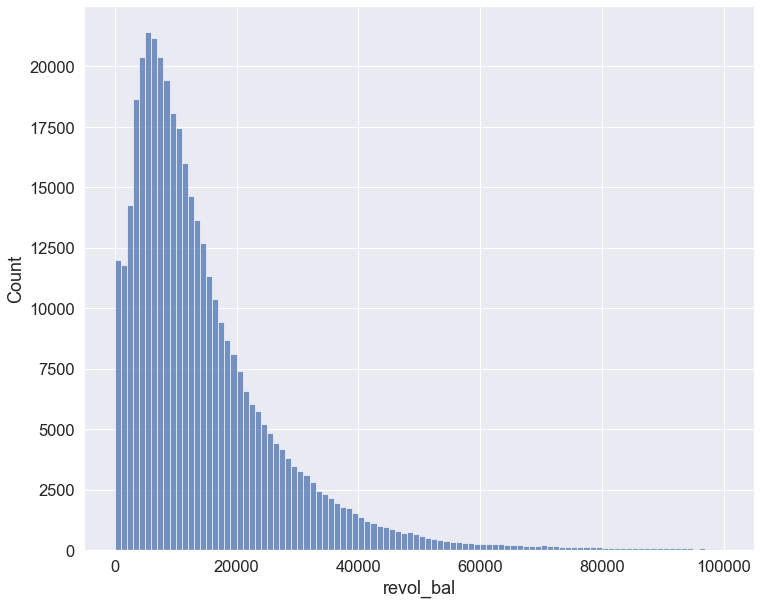

In [87]:
plt.figure(figsize=(12,10))
sns.histplot(data1[data1.revol_bal<100000].revol_bal,bins=100)

**Bivariate plot**

<AxesSubplot:xlabel='revol_bal', ylabel='Count'>

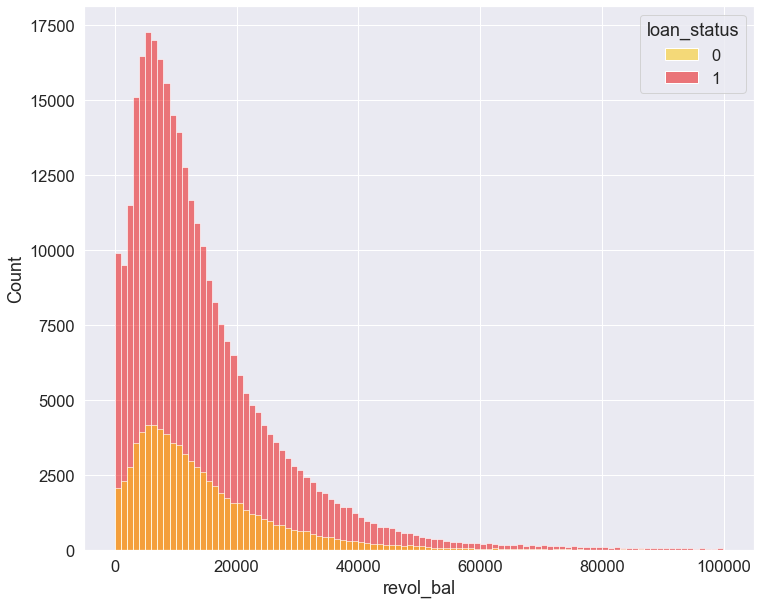

In [88]:
plt.figure(figsize=(12,10))
sns.histplot(data1[data1.revol_bal<100000],x='revol_bal',hue='loan_status',bins=100,palette='hot_r')

### revol_util

In [89]:
info[info.LoanStatNew=='revol_util'].Description

22    Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
Name: Description, dtype: object

In [90]:
data1.revol_util.describe()

count    395754.000000
mean         53.791749
std          24.452193
min           0.000000
25%          35.800000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

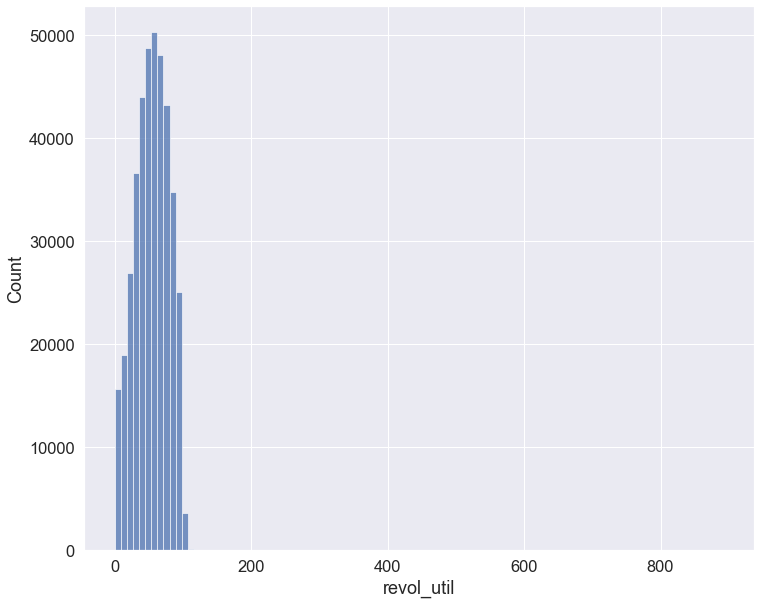

In [91]:
plt.figure(figsize=(12,10))
sns.histplot(data1.revol_util,bins=100)

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

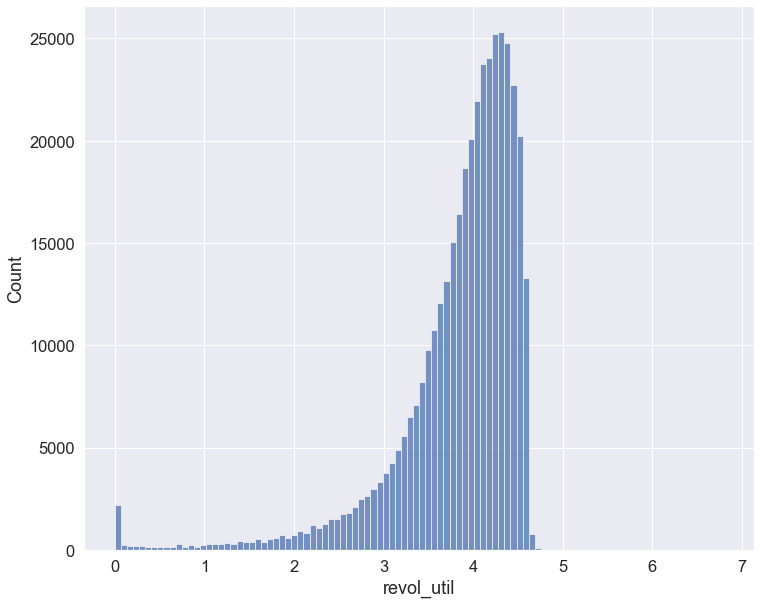

In [92]:
plt.figure(figsize=(12,10))
sns.histplot(np.log1p(data1.revol_util),bins=100)

In [93]:
len(data1[data1.revol_util<150])/len(data1)*100

99.92929828548343

#### Histplot of revol_util<150 (99.93% of data)

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

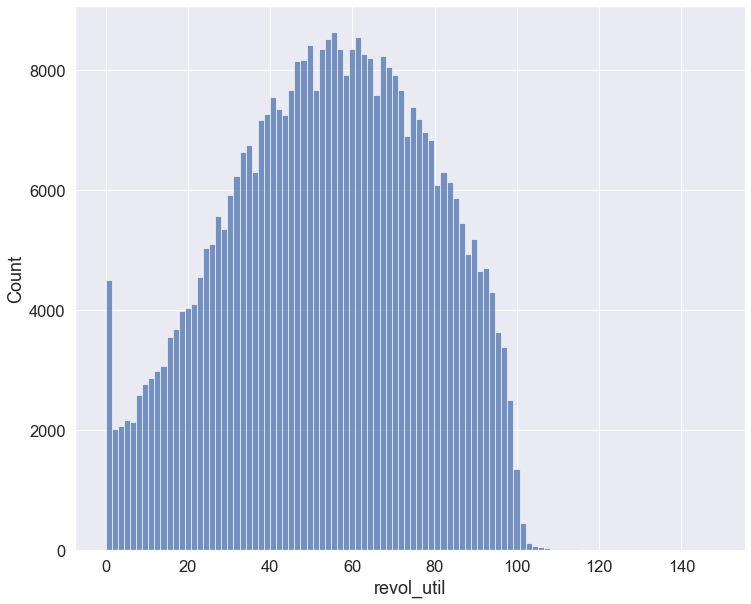

In [94]:
plt.figure(figsize=(12,10))
sns.histplot(data1[data1.revol_util<150].revol_util,bins=100)

**Bivariate plot**

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

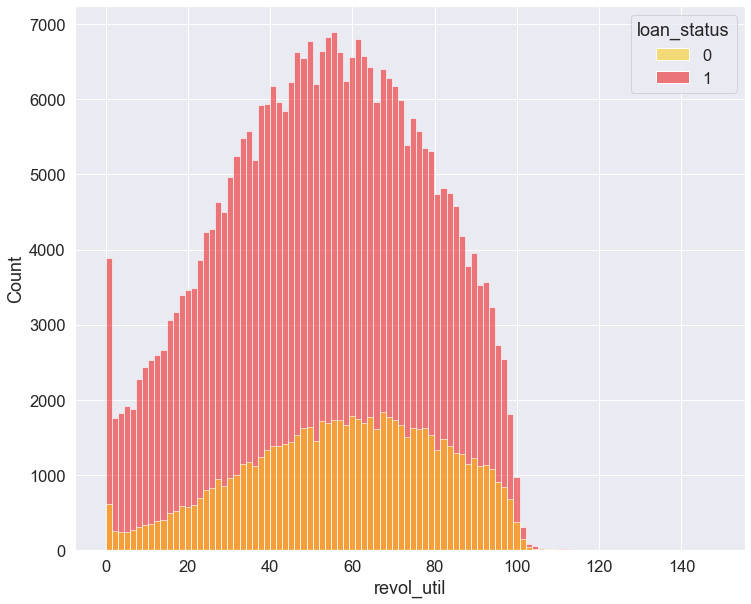

In [95]:
plt.figure(figsize=(12,10))
sns.histplot(data1[data1.revol_util<150],x='revol_util',hue='loan_status',bins=100,palette='hot_r')

### mort_acc

In [96]:
info[info.LoanStatNew=='mort_acc'].Description

26    Number of mortgage accounts.
Name: Description, dtype: object

In [97]:
data1.mort_acc.describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

<AxesSubplot:xlabel='mort_acc', ylabel='Count'>

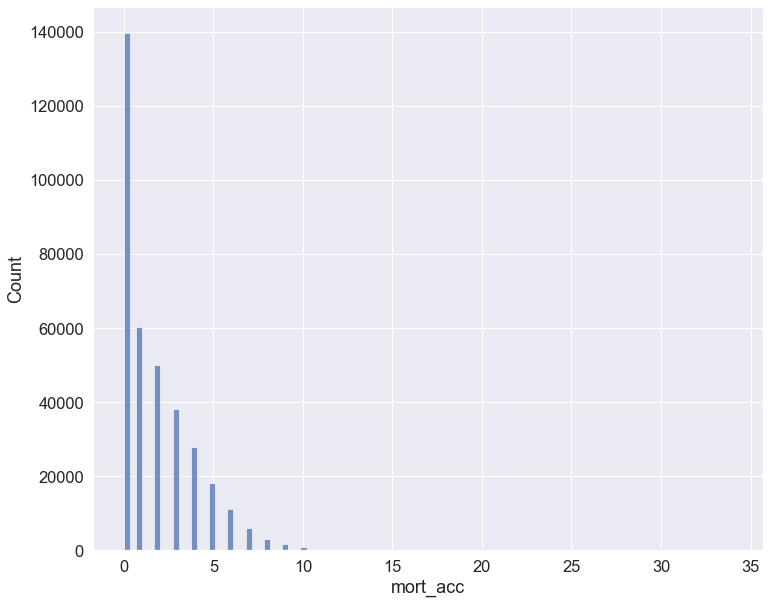

In [98]:
plt.figure(figsize=(12,10))
sns.histplot(data1.mort_acc,bins=100)

<AxesSubplot:xlabel='mort_acc', ylabel='Count'>

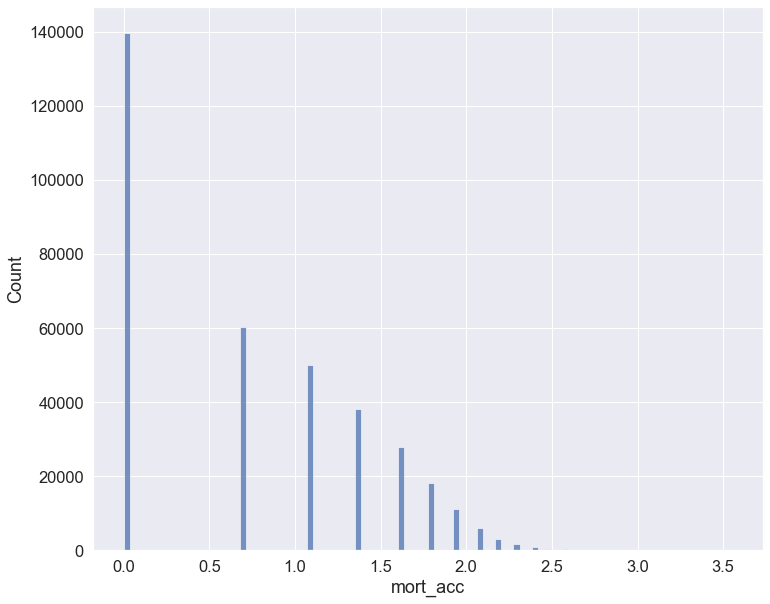

In [99]:
plt.figure(figsize=(12,10))
sns.histplot(np.log1p(data1.mort_acc),bins=100)

In [100]:
len(data1[data1.mort_acc<13])/len(data1)

0.9034088326641921

**Null values**

In [101]:
data1.mort_acc.isna().sum()

37795

In [102]:
data1.mort_acc.notna().sum()

358235

In [103]:
len(data1[data1.mort_acc<13])/data1.mort_acc.notna().sum()

0.9987215096235711

#### Histplot of mort_acc<13 (99.87% of data)

<AxesSubplot:xlabel='mort_acc', ylabel='Count'>

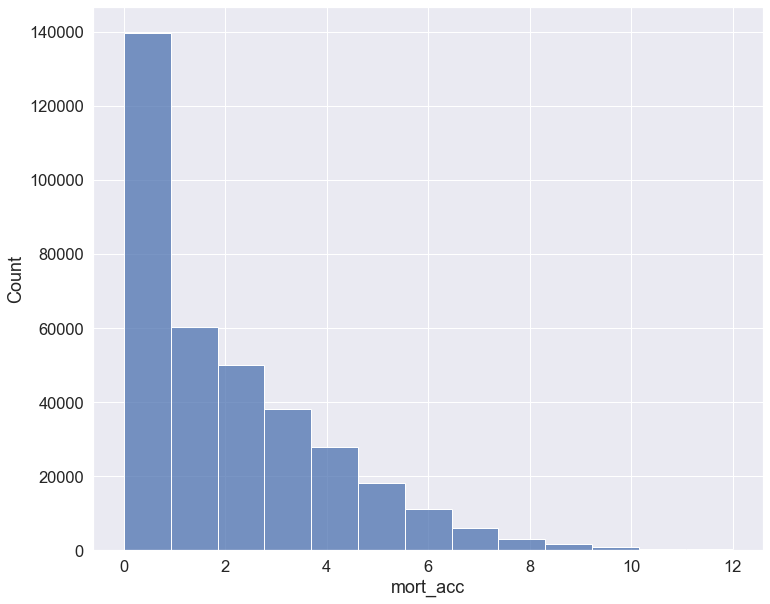

In [104]:
plt.figure(figsize=(12,10))
sns.histplot(data1[data1.mort_acc<13].mort_acc,bins=13)

**Bivariate plot**

<AxesSubplot:xlabel='mort_acc', ylabel='Count'>

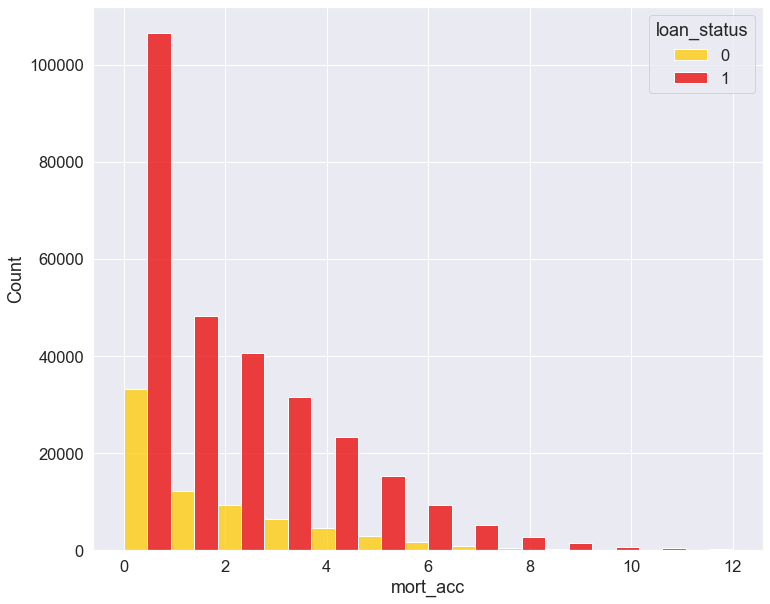

In [105]:
plt.figure(figsize=(12,10))
sns.histplot(data1[data1.mort_acc<13],x='mort_acc',hue='loan_status',bins=13,palette='hot_r',multiple='dodge')

## Categorical Features

In [106]:
data1.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 396030 non-null  object
 1   grade                396030 non-null  object
 2   sub_grade            396030 non-null  object
 3   emp_title            373103 non-null  object
 4   emp_length           377729 non-null  object
 5   home_ownership       396030 non-null  object
 6   verification_status  396030 non-null  object
 7   issue_d              396030 non-null  object
 8   purpose              396030 non-null  object
 9   title                394275 non-null  object
 10  earliest_cr_line     396030 non-null  object
 11  initial_list_status  396030 non-null  object
 12  application_type     396030 non-null  object
 13  address              396030 non-null  object
dtypes: object(14)
memory usage: 42.3+ MB


### 1. term

In [107]:
info[info.LoanStatNew=='term'].Description

1    The number of payments on the loan. Values are in months and can be either 36 or 60.
Name: Description, dtype: object

In [108]:
data1.term.describe()

count         396030
unique             2
top        36 months
freq          302005
Name: term, dtype: object

<AxesSubplot:xlabel='term', ylabel='count'>

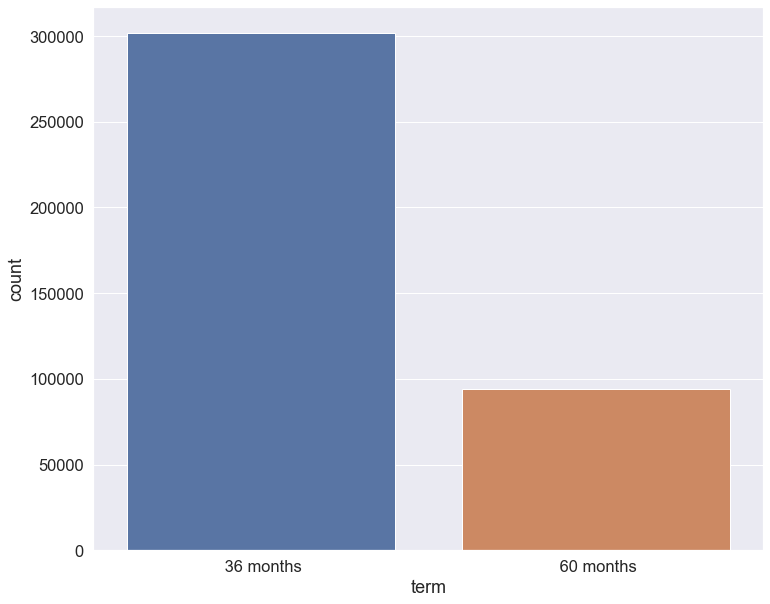

In [109]:
plt.figure(figsize=(12,10))
sns.countplot(data=data1,x='term')

**Bivariate plot**

<AxesSubplot:xlabel='term', ylabel='count'>

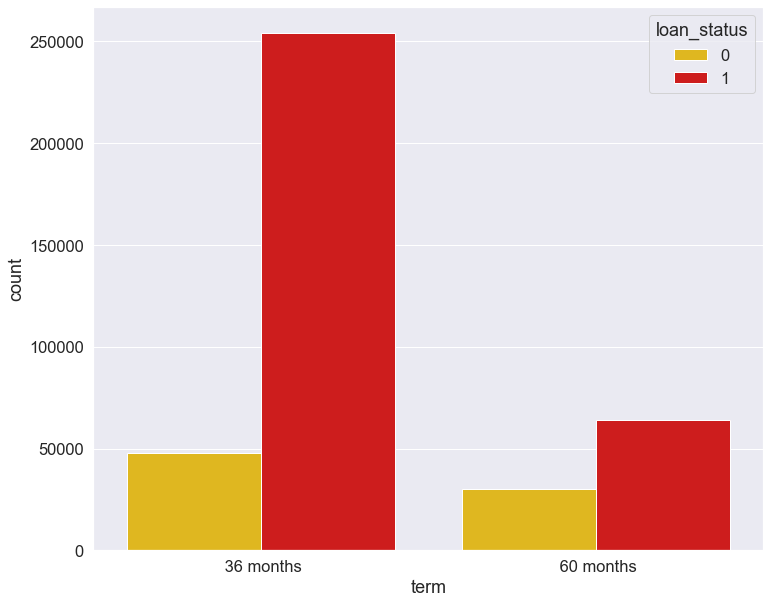

In [110]:
plt.figure(figsize=(12,10))
sns.countplot(data=data1,x='term',hue='loan_status',palette='hot_r')

### 2. grade

In [111]:
info[info.LoanStatNew=='grade'].Description

4    LC assigned loan grade
Name: Description, dtype: object

In [112]:
data1.grade.describe()

count     396030
unique         7
top            B
freq      116018
Name: grade, dtype: object

In [113]:
grades=sorted(data1.grade.unique())

<AxesSubplot:xlabel='grade', ylabel='count'>

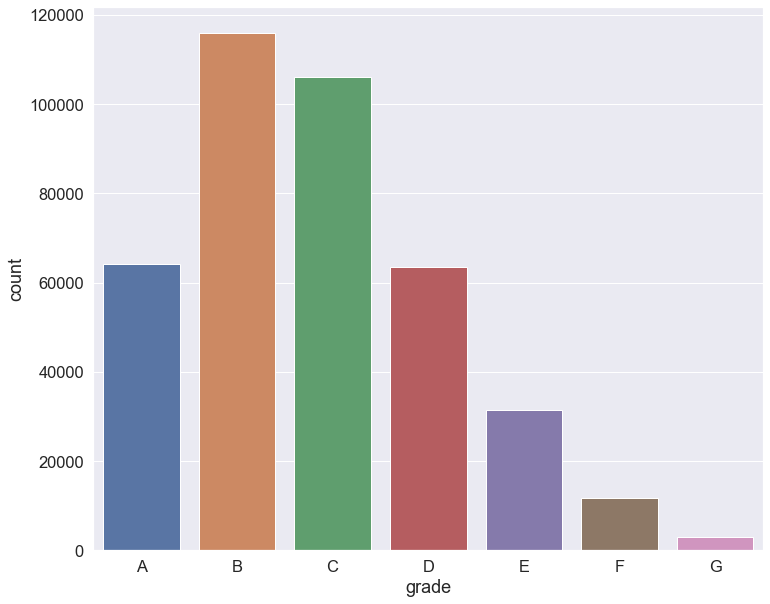

In [114]:
plt.figure(figsize=(12,10))
sns.countplot(data=data1,x='grade',order=grades)

**Bivariate plot**

<AxesSubplot:xlabel='grade', ylabel='count'>

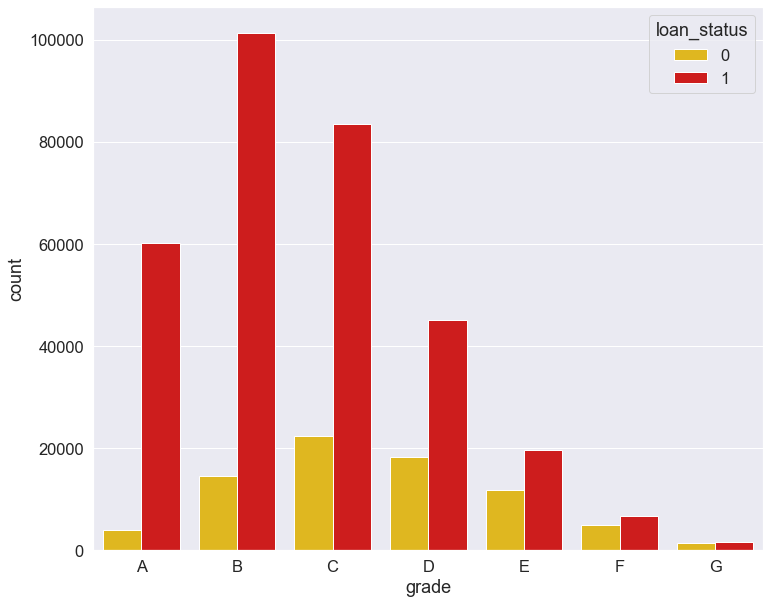

In [115]:
plt.figure(figsize=(12,10))
sns.countplot(data=data1,x='grade',hue='loan_status',palette='hot_r',order=grades)

### 3. sub_grade

In [116]:
info[info.LoanStatNew=='sub_grade'].Description

5    LC assigned loan subgrade
Name: Description, dtype: object

In [117]:
data1.sub_grade.describe()

count     396030
unique        35
top           B3
freq       26655
Name: sub_grade, dtype: object

In [118]:
sub_grades=sorted(data1.sub_grade.unique())

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

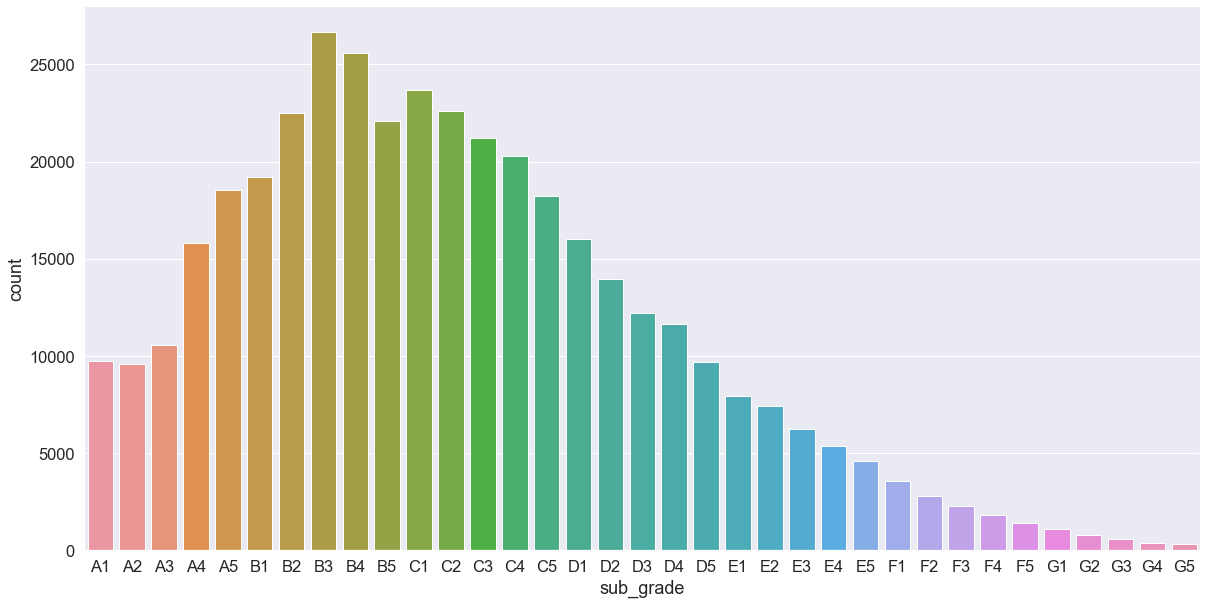

In [119]:
plt.figure(figsize=(20,10))
sns.countplot(data=data1,x='sub_grade',order=sub_grades)

**Bivariate plot**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

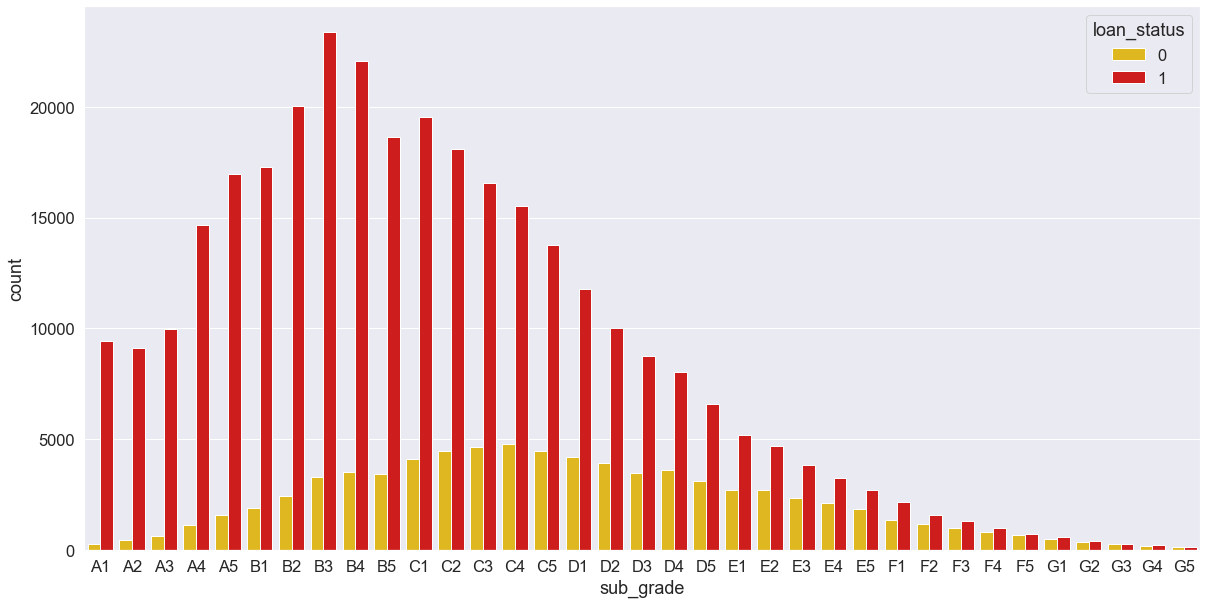

In [120]:
plt.figure(figsize=(20,10))
sns.countplot(data=data1,x='sub_grade',hue='loan_status',palette='hot_r',order=sub_grades)

### 4. emp_title

In [121]:
info[info.LoanStatNew=='emp_title'].Description

6    The job title supplied by the Borrower when applying for the loan.*
Name: Description, dtype: object

In [122]:
data1.emp_title.describe()

count      373103
unique     173105
top       Teacher
freq         4389
Name: emp_title, dtype: object

In [123]:
data1.emp_title.head()

0                  Marketing
1            Credit analyst 
2               Statistician
3            Client Advocate
4    Destiny Management Inc.
Name: emp_title, dtype: object

In [124]:
data1.emp_title.value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**emp_title with atleast 100 repetitions : 268**

In [125]:
emp_title_df=data1.emp_title.value_counts()
emp_title_df[emp_title_df>100]

Teacher                4389
Manager                4250
Registered Nurse       1856
RN                     1846
Supervisor             1830
                       ... 
COO                     102
Bus Operator            102
Graphic Designer        102
tech                    101
Associate Professor     101
Name: emp_title, Length: 268, dtype: int64

**Too many categories. Irrelevant feature**

### 5. emp_length

In [126]:
info[info.LoanStatNew=='emp_length'].Description

7    Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
Name: Description, dtype: object

In [127]:
data1.emp_length.describe()

count        377729
unique           11
top       10+ years
freq         126041
Name: emp_length, dtype: object

**sorting**

In [128]:
emp_lengths=sorted(data1.emp_length.astype(str).unique())
emp_lengths

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 'nan']

In [129]:
emp_lengths[0],emp_lengths[1],emp_lengths[-2]=emp_lengths[-2],emp_lengths[0],emp_lengths[1]
emp_lengths

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years',
 'nan']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

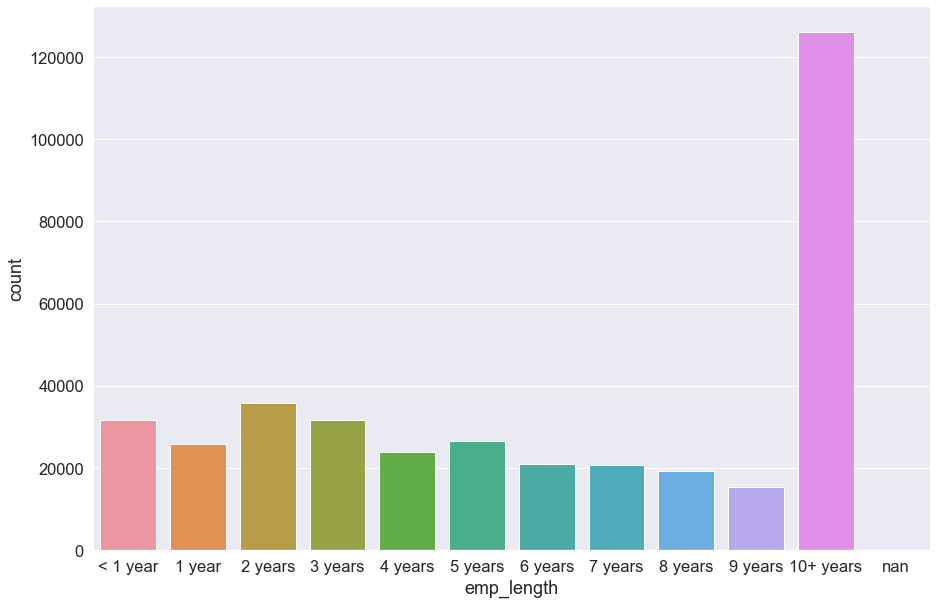

In [130]:
plt.figure(figsize=(15,10))
sns.countplot(data=data1,x='emp_length',order=emp_lengths)

**Bivariate plot**

<AxesSubplot:xlabel='emp_length', ylabel='count'>

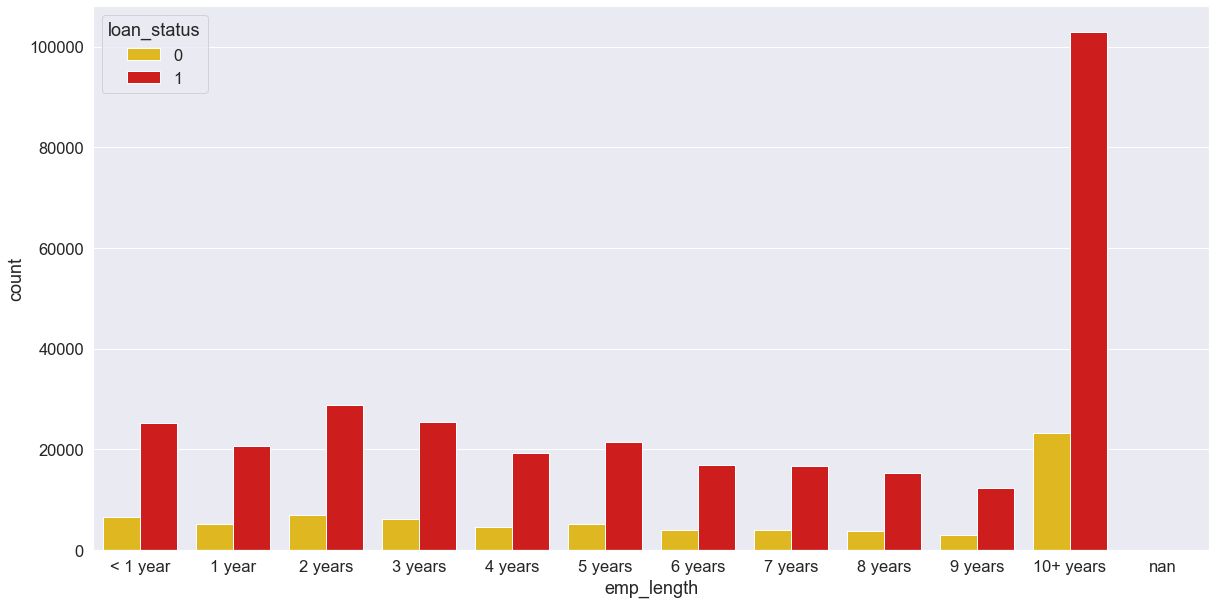

In [131]:
plt.figure(figsize=(20,10))
sns.countplot(data=data1,x='emp_length',hue='loan_status',palette='hot_r',order=emp_lengths)

**Target variable distribution is similar in different emp_length**

In [132]:
emp_lengths_df=data1.groupby('emp_length').loan_status.mean()
emp_lengths_df

emp_length
1 year       0.800865
10+ years    0.815814
2 years      0.806738
3 years      0.804769
4 years      0.807615
5 years      0.807813
6 years      0.810806
7 years      0.805226
8 years      0.800240
9 years      0.799530
< 1 year     0.793128
Name: loan_status, dtype: float64

### 6. home_ownership

In [133]:
info[info.LoanStatNew=='home_ownership'].Description

8    The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
Name: Description, dtype: object

In [134]:
data1.home_ownership.describe()

count       396030
unique           6
top       MORTGAGE
freq        198348
Name: home_ownership, dtype: object

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

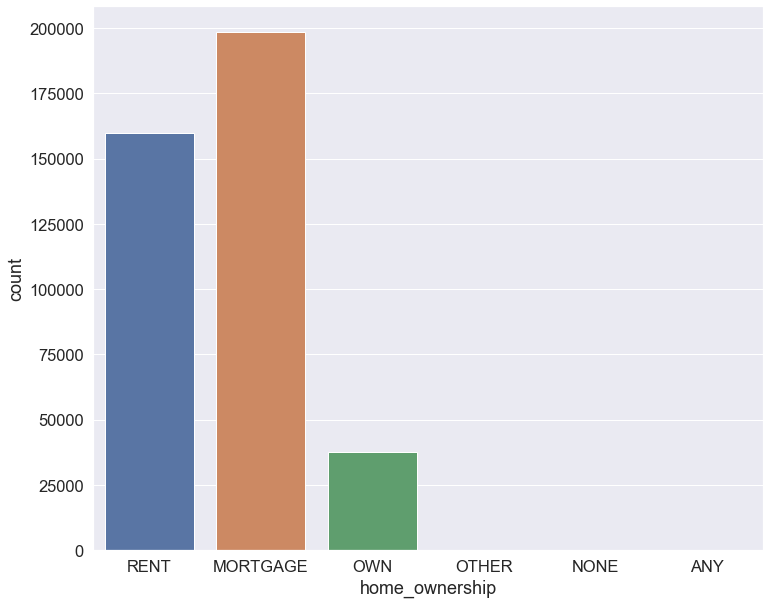

In [135]:
plt.figure(figsize=(12,10))
sns.countplot(data=data1,x='home_ownership')

**Bivariate plot**

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

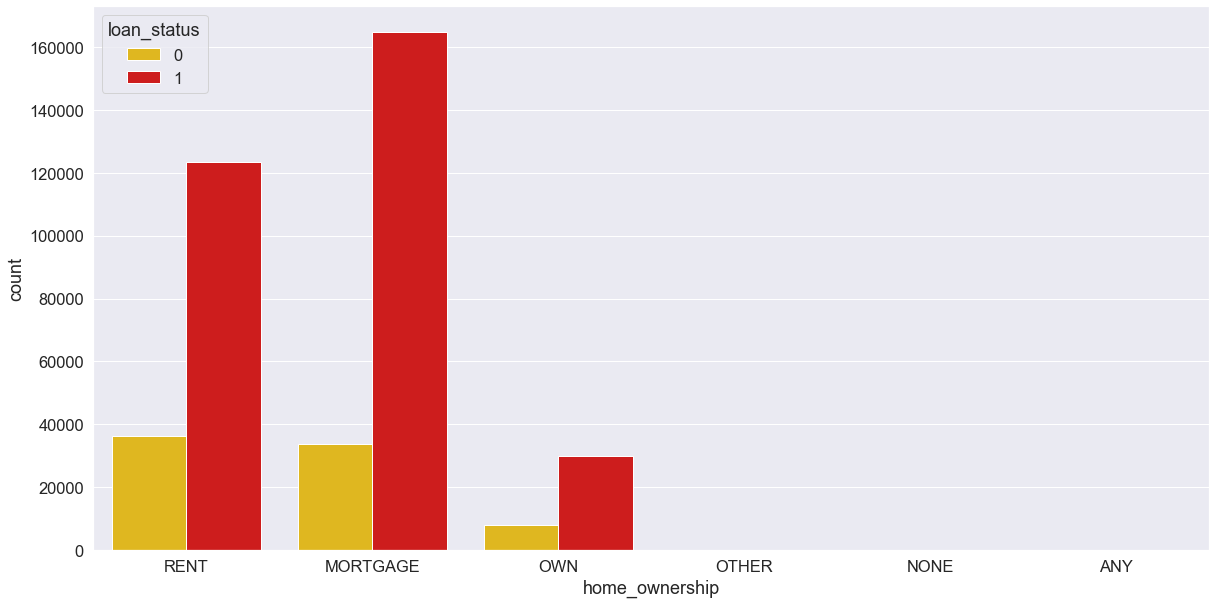

In [136]:
plt.figure(figsize=(20,10))
sns.countplot(data=data1,x='home_ownership',hue='loan_status',palette='hot_r')

In [137]:
data1.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

**Percentage value_counts**

In [138]:
data1.home_ownership.value_counts(normalize=True)*100

MORTGAGE    50.084085
RENT        40.347953
OWN          9.531096
OTHER        0.028281
NONE         0.007828
ANY          0.000758
Name: home_ownership, dtype: float64

**Need data cleaning**

### 7. verification_status

In [139]:
info[info.LoanStatNew=='verification_status'].Description

10    Indicates if income was verified by LC, not verified, or if the income source was verified
Name: Description, dtype: object

In [140]:
data1.verification_status.describe()

count       396030
unique           3
top       Verified
freq        139563
Name: verification_status, dtype: object

<AxesSubplot:xlabel='verification_status', ylabel='count'>

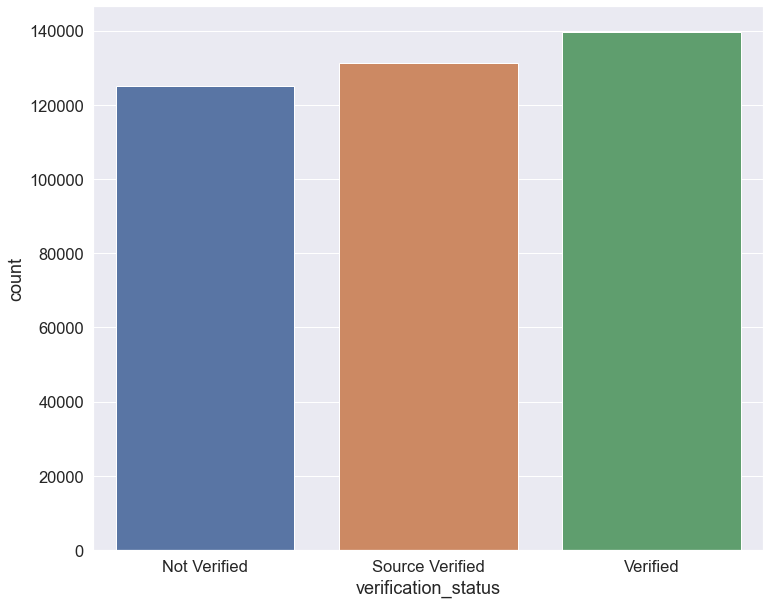

In [141]:
plt.figure(figsize=(12,10))
sns.countplot(data=data1,x='verification_status')

**Bivariate plot**

<AxesSubplot:xlabel='verification_status', ylabel='count'>

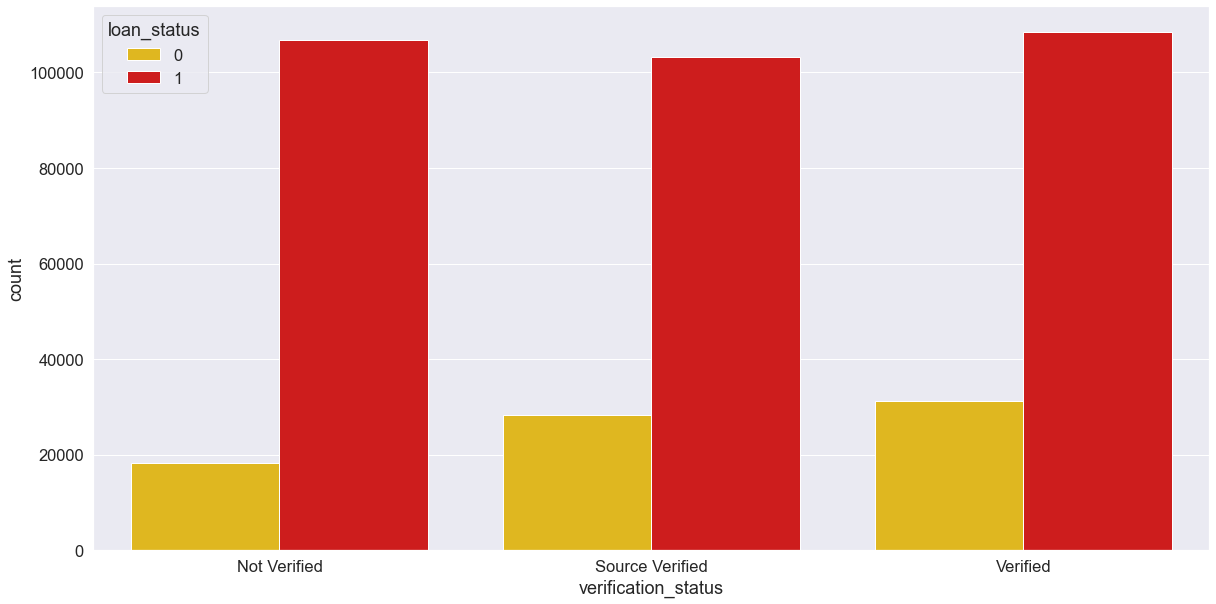

In [142]:
plt.figure(figsize=(20,10))
sns.countplot(data=data1,x='verification_status',hue='loan_status',palette='hot_r')

### 8. issue_d

In [143]:
info[info.LoanStatNew=='issue_d'].Description

11    The month which the loan was funded
Name: Description, dtype: object

In [144]:
data1.issue_d.describe()

count       396030
unique         115
top       Oct-2014
freq         14846
Name: issue_d, dtype: object

**Not available realistically before loan decision. Need to be dropped to prevent data leakage**

### 9. purpose

In [145]:
info[info.LoanStatNew=='purpose'].Description

13    A category provided by the borrower for the loan request. 
Name: Description, dtype: object

In [146]:
data1.purpose.describe()

count                 396030
unique                    14
top       debt_consolidation
freq                  234507
Name: purpose, dtype: object

<AxesSubplot:xlabel='count', ylabel='purpose'>

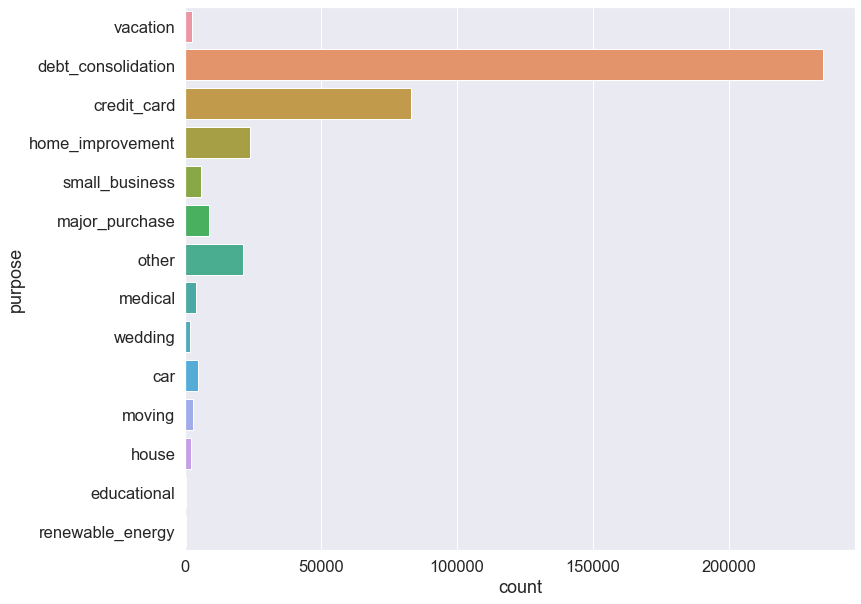

In [147]:
plt.figure(figsize=(12,10))
sns.countplot(data=data1,y='purpose')

**Bivariate plot**

<AxesSubplot:xlabel='count', ylabel='purpose'>

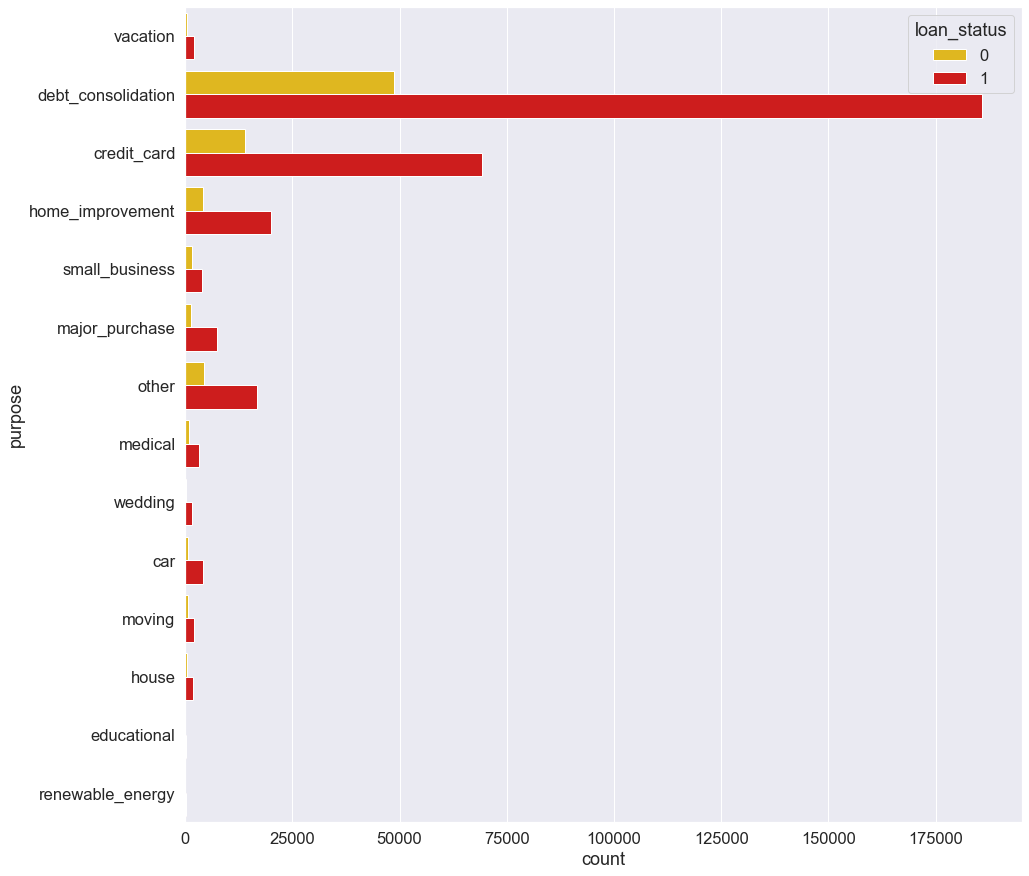

In [148]:
plt.figure(figsize=(15,15))
sns.countplot(data=data1,y='purpose',hue='loan_status',palette='hot_r')

### 10. title

In [149]:
info[info.LoanStatNew=='title'].Description

14    The loan title provided by the borrower
Name: Description, dtype: object

In [150]:
data1.title.describe()

count                 394275
unique                 48817
top       Debt consolidation
freq                  152472
Name: title, dtype: object

In [151]:
data1.title.head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [152]:
data1.title.value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

**title with atleast 100 repetitions : 138**

In [153]:
title_df=data1.title.value_counts()
title_df[title_df>100]

Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
                            ...  
Refi                          105
Debt Relief                   103
Debt loan                     103
Credit                        101
Credit card                   101
Name: title, Length: 138, dtype: int64

**Too many categories. Irrelevant feature**

### 11. earliest_cr_line

In [154]:
info[info.LoanStatNew=='earliest_cr_line'].Description

18    The month the borrower's earliest reported credit line was opened
Name: Description, dtype: object

In [155]:
data1.earliest_cr_line.describe()

count       396030
unique         684
top       Oct-2000
freq          3017
Name: earliest_cr_line, dtype: object

In [156]:
data1.earliest_cr_line.head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

**Could be feature engineered**

### 12. initial_list_status

In [157]:
info[info.LoanStatNew=='initial_list_status'].Description

24    The initial listing status of the loan. Possible values are – W, F
Name: Description, dtype: object

In [158]:
data1.initial_list_status.describe()

count     396030
unique         2
top            f
freq      238066
Name: initial_list_status, dtype: object

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

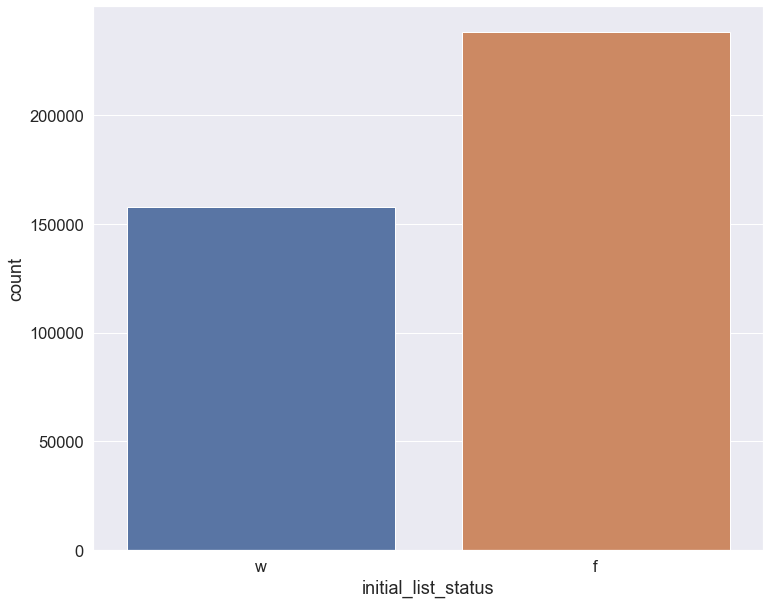

In [159]:
plt.figure(figsize=(12,10))
sns.countplot(data=data1,x='initial_list_status')

**Bivariate plot**

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

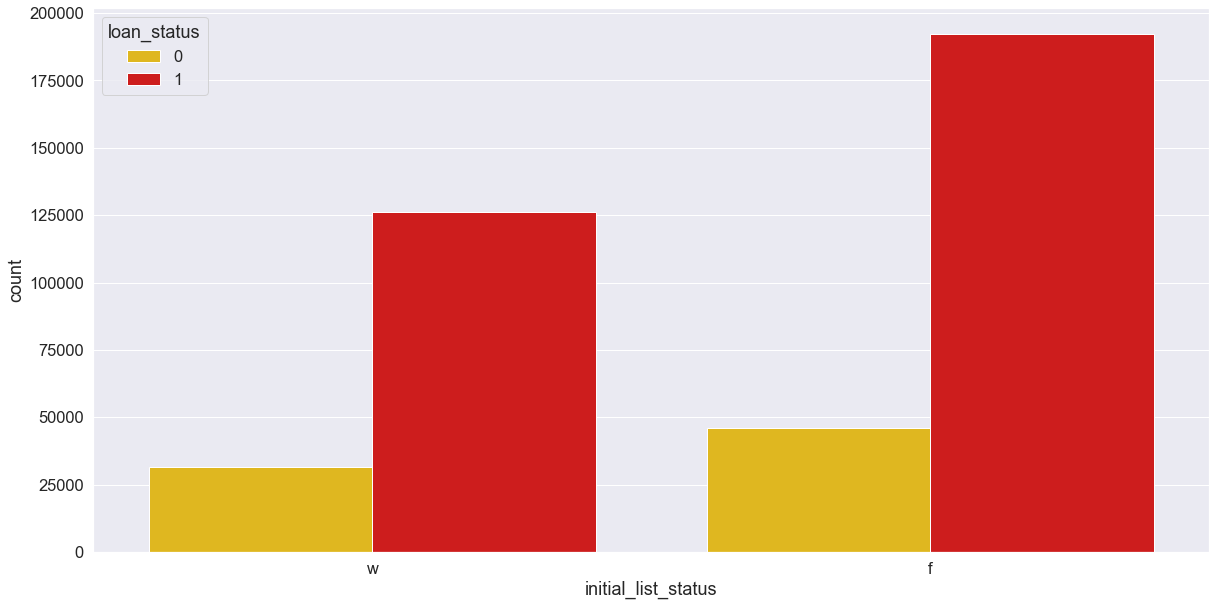

In [160]:
plt.figure(figsize=(20,10))
sns.countplot(data=data1,x='initial_list_status',hue='loan_status',palette='hot_r')

### 13. application_type

In [161]:
info[info.LoanStatNew=='application_type'].Description

25    Indicates whether the loan is an individual application or a joint application with two co-borrowers
Name: Description, dtype: object

In [162]:
data1.application_type.describe()

count         396030
unique             3
top       INDIVIDUAL
freq          395319
Name: application_type, dtype: object

<AxesSubplot:xlabel='application_type', ylabel='count'>

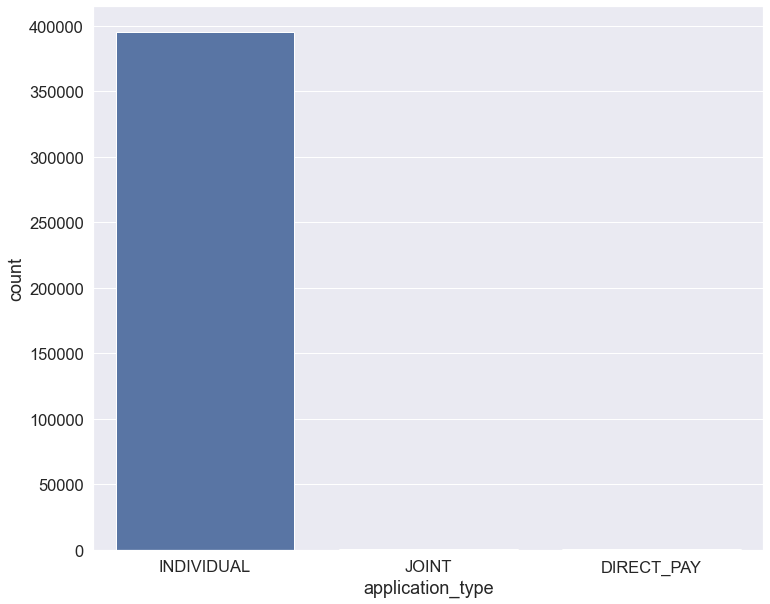

In [163]:
plt.figure(figsize=(12,10))
sns.countplot(data=data1,x='application_type')

**Bivariate plot**

<AxesSubplot:xlabel='application_type', ylabel='count'>

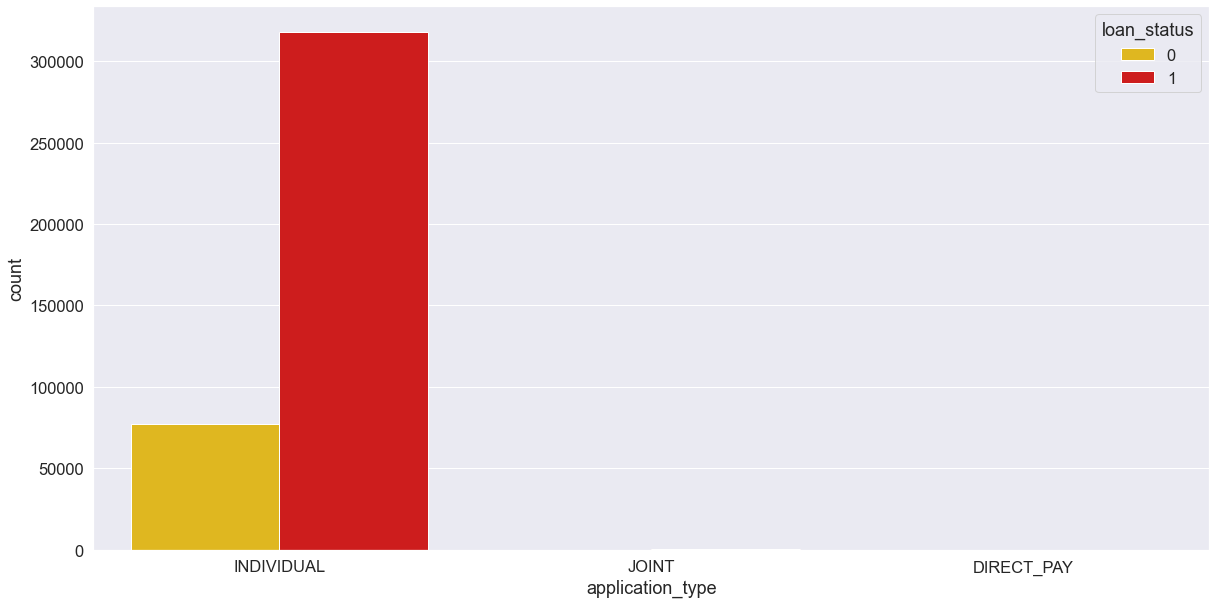

In [164]:
plt.figure(figsize=(20,10))
sns.countplot(data=data1,x='application_type',hue='loan_status',palette='hot_r')

**Target variable distribution is similar in different application_type**

In [165]:
application_type_df=data1.groupby('application_type').loan_status.mean()
application_type_df

application_type
DIRECT_PAY    0.643357
INDIVIDUAL    0.803913
JOINT         0.872941
Name: loan_status, dtype: float64

In [166]:
data1.application_type.value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

**Percentage value_counts**

In [167]:
data1.application_type.value_counts(normalize=True)*100

INDIVIDUAL    99.820468
JOINT          0.107315
DIRECT_PAY     0.072217
Name: application_type, dtype: float64

### 14. address

In [168]:
info[info.LoanStatNew=='address'].Description

Series([], Name: Description, dtype: object)

In [169]:
data1.address.head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [170]:
data1.address.describe()

count                        396030
unique                       393700
top       USCGC Smith\nFPO AE 70466
freq                              8
Name: address, dtype: object

In [171]:
data1.address.value_counts()

USCGC Smith\nFPO AE 70466                           8
USS Johnson\nFPO AE 48052                           8
USNS Johnson\nFPO AE 05113                          8
USS Smith\nFPO AP 70466                             8
USNS Johnson\nFPO AP 48052                          7
                                                   ..
455 Tricia Cove\nAustinbury, FL 00813               1
7776 Flores Fall\nFernandezshire, UT 05113          1
6577 Mia Harbors Apt. 171\nRobertshire, OK 22690    1
8141 Cox Greens Suite 186\nMadisonstad, VT 05113    1
787 Michelle Causeway\nBriannaton, AR 48052         1
Name: address, Length: 393700, dtype: int64

**Zip codes can be feature engineered**

## Correlations of categorical features

### 1. term

#### Bivariate plot showing label ratios

<AxesSubplot:xlabel='term', ylabel='Count'>

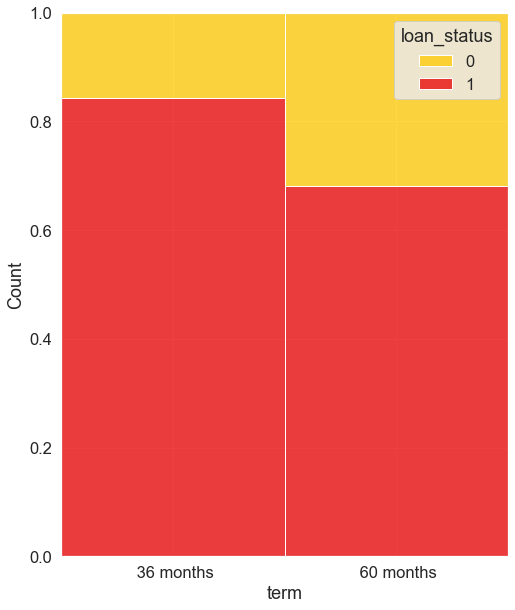

In [172]:
plt.figure(figsize=(8,10))
sns.histplot(data=data1,x='term',hue='loan_status',palette='hot_r',multiple='fill')

#### Target variable distribution in different term

In [173]:
term_df=data1.groupby('term').loan_status.mean()
term_df

term
 36 months    0.842254
 60 months    0.680585
Name: loan_status, dtype: float64

**Label distribution is different**

### 2. grade

#### Bivariate plot showing label ratios

<AxesSubplot:xlabel='grade', ylabel='Count'>

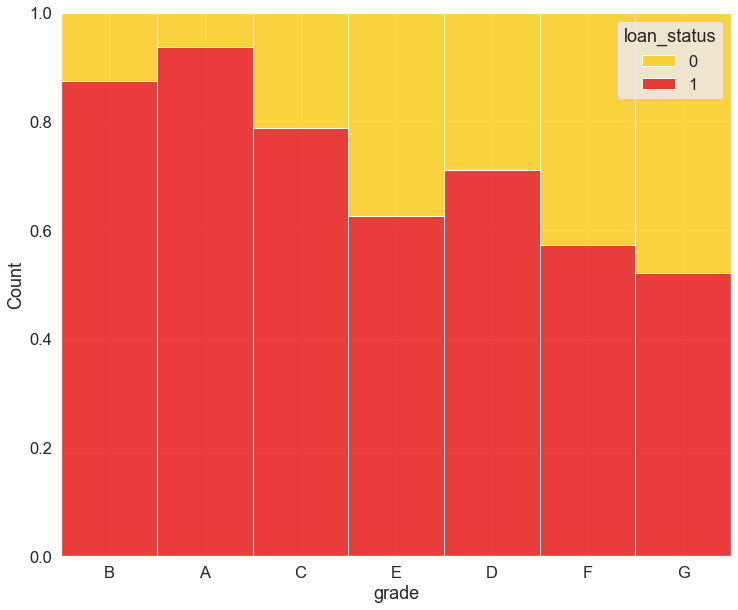

In [174]:
plt.figure(figsize=(12,10))
sns.histplot(data=data1,x='grade',hue='loan_status',palette='hot_r',multiple='fill')

#### Target variable distribution in different grade

In [175]:
grade_df=data1.groupby('grade').loan_status.mean()
grade_df

grade
A    0.937121
B    0.874270
C    0.788191
D    0.711322
E    0.626366
F    0.572120
G    0.521611
Name: loan_status, dtype: float64

**Label distribution is different**

### 3. sub_grade

#### Bivariate plot showing label ratios

<AxesSubplot:xlabel='sub_grade', ylabel='Count'>

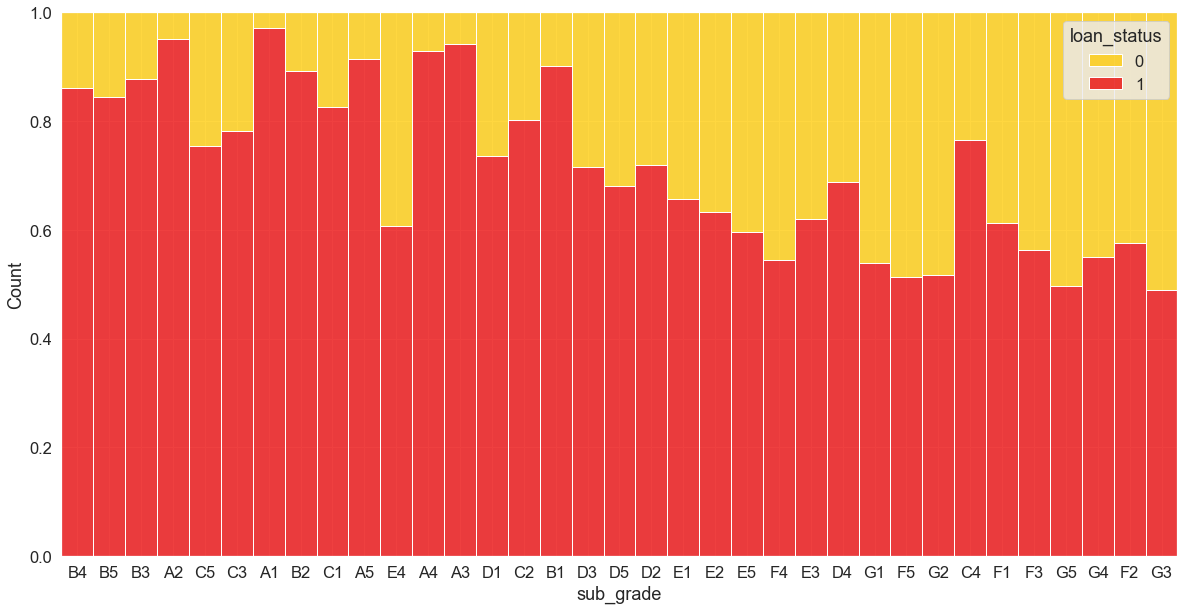

In [176]:
plt.figure(figsize=(20,10))
sns.histplot(data=data1,x='sub_grade',hue='loan_status',palette='hot_r',multiple='fill')

#### Target variable distribution in different sub_grade

In [177]:
sub_grade_df=data1.groupby('sub_grade').loan_status.mean()
sub_grade_df

sub_grade
A1    0.971323
A2    0.951814
A3    0.941944
A4    0.929761
A5    0.915092
B1    0.901418
B2    0.891487
B3    0.876646
B4    0.861607
B5    0.844963
C1    0.826304
C2    0.802480
C3    0.781584
C4    0.764645
C5    0.754933
D1    0.736197
D2    0.719662
D3    0.715782
D4    0.688685
D5    0.679897
E1    0.655930
E2    0.632620
E3    0.619623
E4    0.606976
E5    0.596894
F1    0.612557
F2    0.575199
F3    0.563867
F4    0.543928
F5    0.513243
G1    0.538752
G2    0.517241
G3    0.489130
G4    0.550802
G5    0.496835
Name: loan_status, dtype: float64

**Label distribution is different**

### 4. emp_length

#### Bivariate plot showing label ratios

<AxesSubplot:xlabel='emp_length', ylabel='Count'>

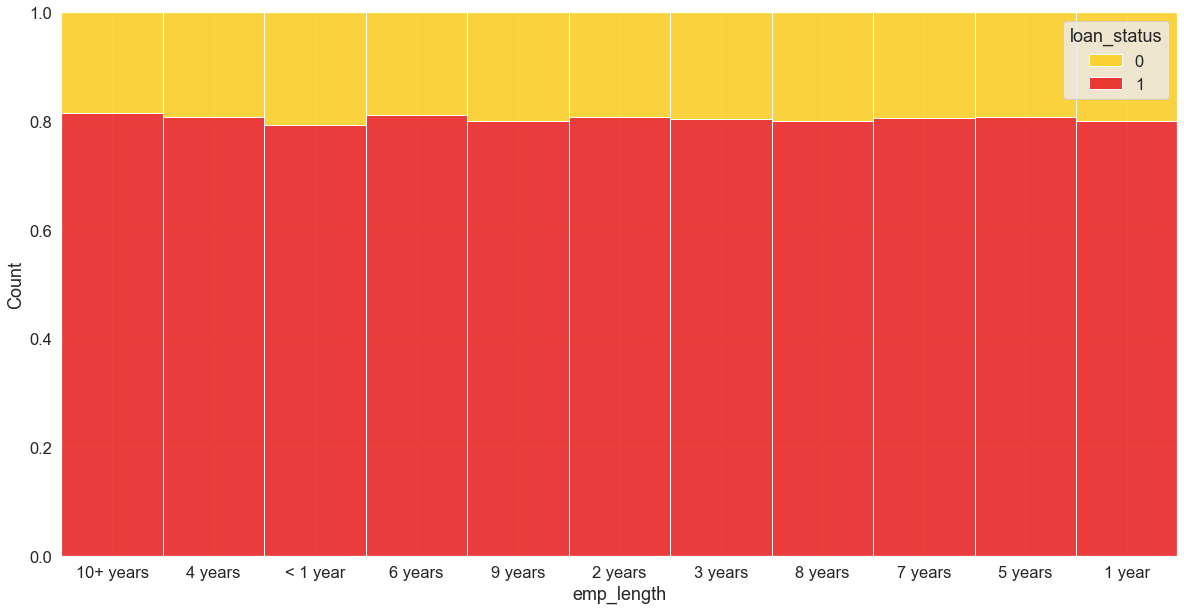

In [178]:
plt.figure(figsize=(20,10))
sns.histplot(data=data1,x='emp_length',hue='loan_status',palette='hot_r',multiple='fill')

#### Target variable distribution is similar in different emp_length

In [179]:
emp_lengths_df=data1.groupby('emp_length').loan_status.mean()
emp_lengths_df

emp_length
1 year       0.800865
10+ years    0.815814
2 years      0.806738
3 years      0.804769
4 years      0.807615
5 years      0.807813
6 years      0.810806
7 years      0.805226
8 years      0.800240
9 years      0.799530
< 1 year     0.793128
Name: loan_status, dtype: float64

**Label distribution is very similar**

### 5. home_ownership

#### Bivariate plot showing label ratios

<AxesSubplot:xlabel='home_ownership', ylabel='Count'>

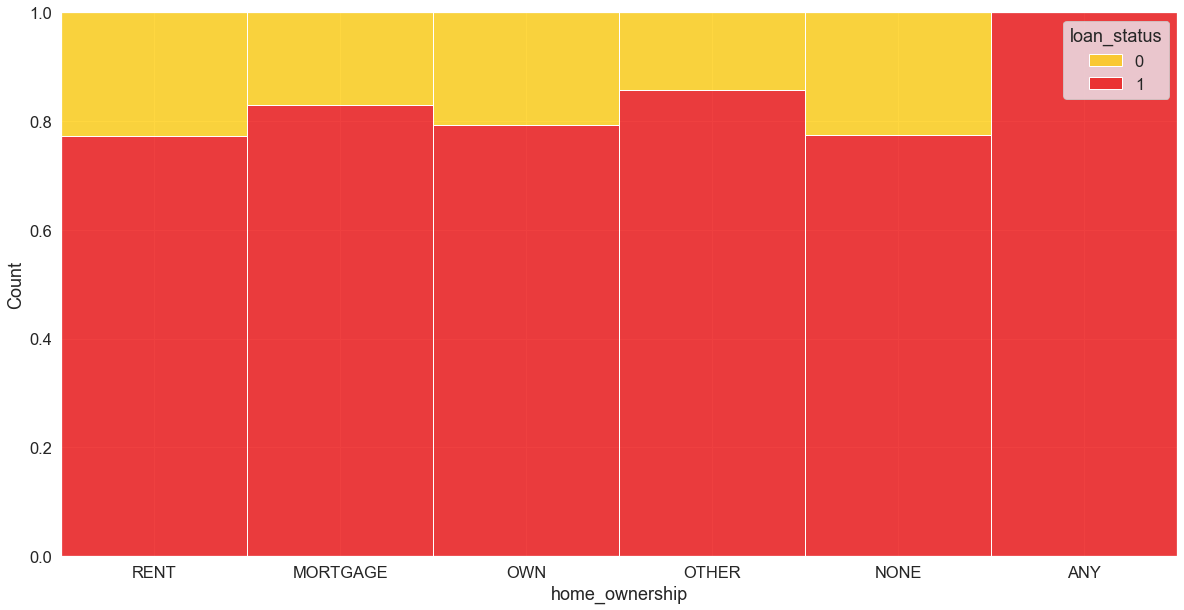

In [180]:
plt.figure(figsize=(20,10))
sns.histplot(data=data1,x='home_ownership',hue='loan_status',palette='hot_r',multiple='fill')

#### Target variable distribution in different home_ownership

In [181]:
home_ownership_df=data1.groupby('home_ownership').loan_status.mean()
home_ownership_df

home_ownership
ANY         1.000000
MORTGAGE    0.830439
NONE        0.774194
OTHER       0.857143
OWN         0.793197
RENT        0.773378
Name: loan_status, dtype: float64

**Label distribution is slightly different**

### 6. verification_status

#### Bivariate plot showing label ratios

<AxesSubplot:xlabel='verification_status', ylabel='Count'>

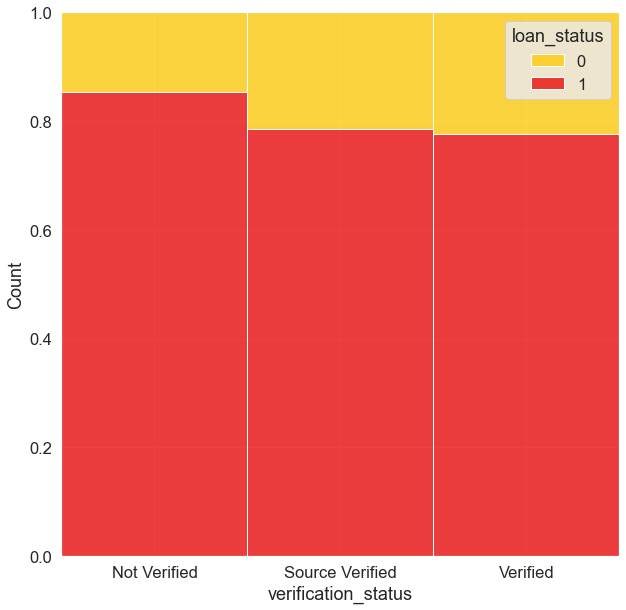

In [182]:
plt.figure(figsize=(10,10))
sns.histplot(data=data1,x='verification_status',hue='loan_status',palette='hot_r',multiple='fill')

#### Target variable distribution in different verification_status

In [183]:
verification_status_df=data1.groupby('verification_status').loan_status.mean()
verification_status_df

verification_status
Not Verified       0.853640
Source Verified    0.785257
Verified           0.776789
Name: loan_status, dtype: float64

**Label distribution is slightly different**

### 7. purpose

#### Bivariate plot showing label ratios

<AxesSubplot:xlabel='Count', ylabel='purpose'>

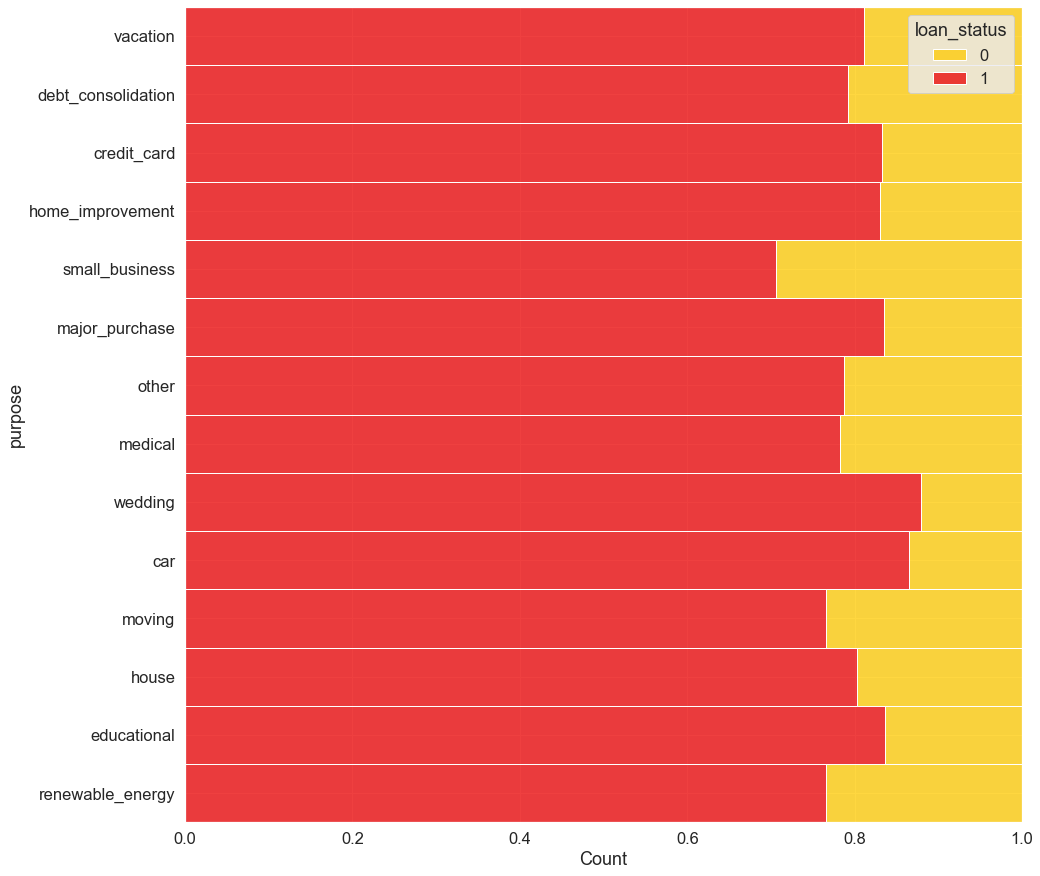

In [184]:
plt.figure(figsize=(15,15))
sns.histplot(data=data1,y='purpose',hue='loan_status',palette='hot_r',multiple='fill')

#### Target variable distribution in different purpose

In [185]:
purpose_df=data1.groupby('purpose').loan_status.mean()
purpose_df

purpose
car                   0.865233
credit_card           0.832882
debt_consolidation    0.792586
educational           0.836576
home_improvement      0.829921
house                 0.802817
major_purchase        0.835267
medical               0.782888
moving                0.765242
other                 0.787822
renewable_energy      0.765957
small_business        0.705490
vacation              0.810767
wedding               0.879139
Name: loan_status, dtype: float64

**Label distribution is different**

### 8. initial_list_status

#### Bivariate plot showing label ratios

<AxesSubplot:xlabel='initial_list_status', ylabel='Count'>

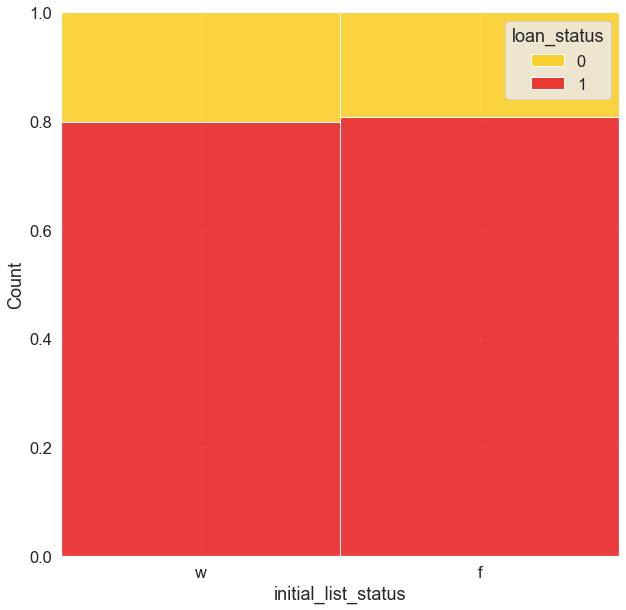

In [186]:
plt.figure(figsize=(10,10))
sns.histplot(data=data1,x='initial_list_status',hue='loan_status',palette='hot_r',multiple='fill')

#### Target variable distribution in different initial_list_status

In [187]:
initial_list_status_df=data1.groupby('initial_list_status').loan_status.mean()
initial_list_status_df

initial_list_status
f    0.806940
w    0.799245
Name: loan_status, dtype: float64

**Label distribution is similar**

### 9. application_type

#### Bivariate plot showing label ratios

<AxesSubplot:xlabel='application_type', ylabel='Count'>

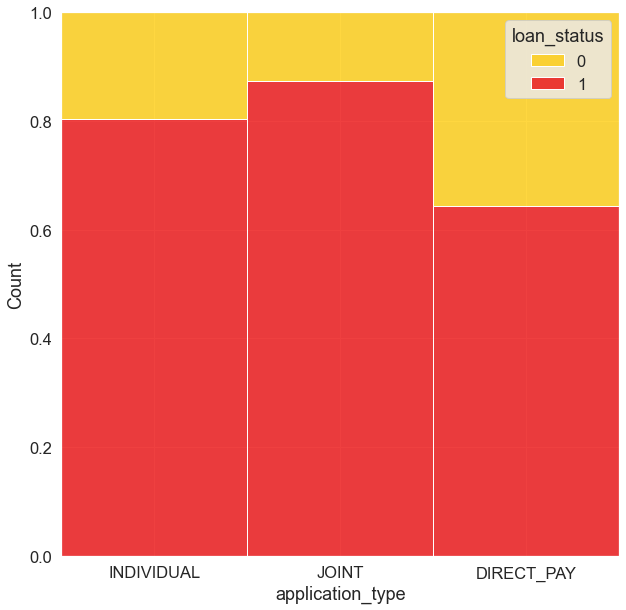

In [188]:
plt.figure(figsize=(10,10))
sns.histplot(data=data1,x='application_type',hue='loan_status',palette='hot_r',multiple='fill')

#### Target variable distribution in different application_type

In [189]:
application_type_df=data1.groupby('application_type').loan_status.mean()
application_type_df

application_type
DIRECT_PAY    0.643357
INDIVIDUAL    0.803913
JOINT         0.872941
Name: loan_status, dtype: float64

**Label distribution is different**

# Feature Engineering

## 1. Feature with dates : earliest_cr_line

In [190]:
info[info.LoanStatNew=='earliest_cr_line'].Description

18    The month the borrower's earliest reported credit line was opened
Name: Description, dtype: object

In [191]:
data1.earliest_cr_line.describe()

count       396030
unique         684
top       Oct-2000
freq          3017
Name: earliest_cr_line, dtype: object

In [192]:
data1.earliest_cr_line.head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

### Converting to date-time format

In [193]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  uint8  
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [194]:
data2=data1.copy()

In [195]:
data2.earliest_cr_line=pd.to_datetime(data2.earliest_cr_line)

### Making month and year feature separate

In [196]:
data2['earliest_cr_line_month']=data2.earliest_cr_line.apply(lambda x:x.month)
data2.earliest_cr_line_month

0          6
1          7
2          8
3          9
4          3
          ..
396025    11
396026     2
396027     3
396028    11
396029     9
Name: earliest_cr_line_month, Length: 396030, dtype: int64

In [197]:
data2['earliest_cr_line_year']=data2.earliest_cr_line.apply(lambda x:x.year)
data2.earliest_cr_line_year

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line_year, Length: 396030, dtype: int64

In [198]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   loan_amnt               396030 non-null  float64       
 1   term                    396030 non-null  object        
 2   int_rate                396030 non-null  float64       
 3   installment             396030 non-null  float64       
 4   grade                   396030 non-null  object        
 5   sub_grade               396030 non-null  object        
 6   emp_title               373103 non-null  object        
 7   emp_length              377729 non-null  object        
 8   home_ownership          396030 non-null  object        
 9   annual_inc              396030 non-null  float64       
 10  verification_status     396030 non-null  object        
 11  issue_d                 396030 non-null  object        
 12  loan_status             396030

### Dropping original date-time features

In [199]:
data2.drop('earliest_cr_line',axis=1,inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   term                    396030 non-null  object 
 2   int_rate                396030 non-null  float64
 3   installment             396030 non-null  float64
 4   grade                   396030 non-null  object 
 5   sub_grade               396030 non-null  object 
 6   emp_title               373103 non-null  object 
 7   emp_length              377729 non-null  object 
 8   home_ownership          396030 non-null  object 
 9   annual_inc              396030 non-null  float64
 10  verification_status     396030 non-null  object 
 11  issue_d                 396030 non-null  object 
 12  loan_status             396030 non-null  uint8  
 13  purpose                 396030 non-null  object 
 14  title               

## 2. Checking if grade and subgrade are linked

### 1. grade=='A'

In [200]:
data2[data2.grade=='A'].sub_grade.value_counts()

A5    18526
A4    15789
A3    10576
A1     9729
A2     9567
Name: sub_grade, dtype: int64

### 2. grade=='B'

In [201]:
data2[data2.grade=='B'].sub_grade.value_counts()

B3    26655
B4    25601
B2    22495
B5    22085
B1    19182
Name: sub_grade, dtype: int64

### 3. grade=='C'

In [202]:
data2[data2.grade=='C'].sub_grade.value_counts()

C1    23662
C2    22580
C3    21221
C4    20280
C5    18244
Name: sub_grade, dtype: int64

### 4. grade=='D'

In [203]:
data2[data2.grade=='D'].sub_grade.value_counts()

D1    15993
D2    13951
D3    12223
D4    11657
D5     9700
Name: sub_grade, dtype: int64

### 5. grade=='E'

In [204]:
data2[data2.grade=='E'].sub_grade.value_counts()

E1    7917
E2    7431
E3    6207
E4    5361
E5    4572
Name: sub_grade, dtype: int64

### 6. grade=='F'

In [205]:
data2[data2.grade=='F'].sub_grade.value_counts()

F1    3536
F2    2766
F3    2286
F4    1787
F5    1397
Name: sub_grade, dtype: int64

### 7. grade=='G'

In [206]:
data2[data2.grade=='G'].sub_grade.value_counts()

G1    1058
G2     754
G3     552
G4     374
G5     316
Name: sub_grade, dtype: int64

**grade and sub_grade are related features**

## Removing grade info from sub_grade

In [207]:
data3=data2.copy()

In [208]:
data3.sub_grade=data3.sub_grade.apply(lambda x:x[1])

In [209]:
data3.sub_grade.head()

0    4
1    5
2    3
3    2
4    5
Name: sub_grade, dtype: object

## 3. Getting zipcodes from address

In [210]:
data4=data3.copy()

In [211]:
info[info.LoanStatNew=='address'].Description

Series([], Name: Description, dtype: object)

In [212]:
data4.address.head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [213]:
data4.address.describe()

count                        396030
unique                       393700
top       USCGC Smith\nFPO AE 70466
freq                              8
Name: address, dtype: object

In [214]:
data4.address=data4.address.apply(lambda x:x[-5:])

In [215]:
data4.address.head()

0    22690
1    05113
2    05113
3    00813
4    11650
Name: address, dtype: object

## EDA of new features

### 1. earliest_cr_line_month

In [216]:
data4.earliest_cr_line_month.value_counts()

10    38291
9     37673
8     37349
11    35583
12    33687
7     31972
3     31617
1     30694
6     30445
5     30445
4     29231
2     29043
Name: earliest_cr_line_month, dtype: int64

<AxesSubplot:xlabel='earliest_cr_line_month', ylabel='count'>

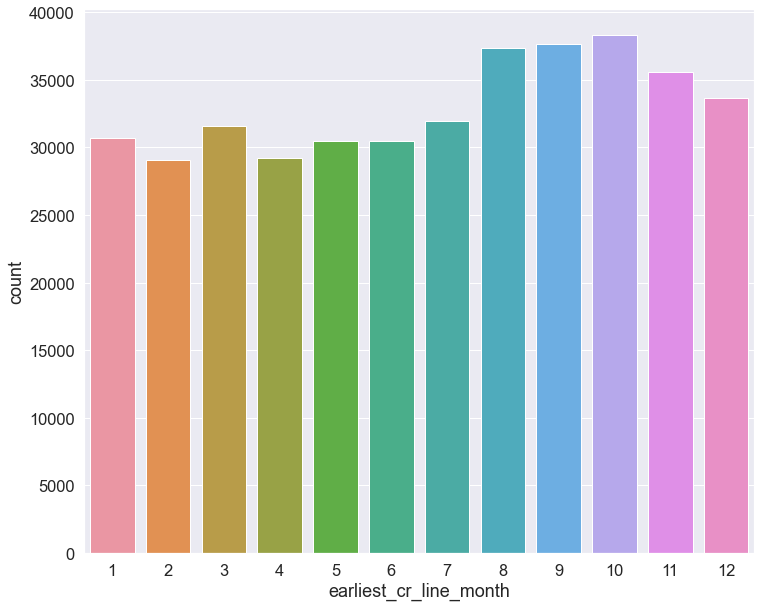

In [217]:
plt.figure(figsize=(12,10))
sns.countplot(data=data4,x='earliest_cr_line_month')

### 2. earliest_cr_line_year

In [218]:
data4.earliest_cr_line_year.value_counts()

2000    29366
2001    29083
1999    26491
2002    25901
2003    23657
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_line_year, Length: 65, dtype: int64

<AxesSubplot:xlabel='earliest_cr_line_year', ylabel='Count'>

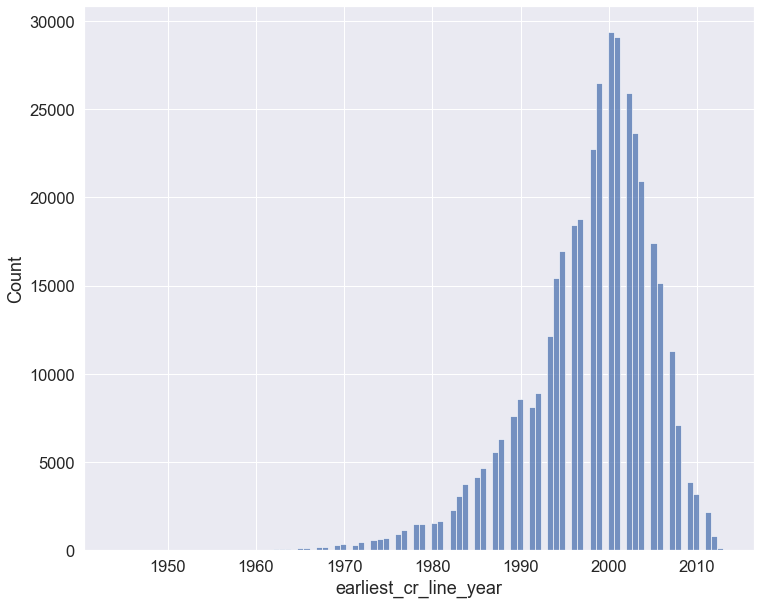

In [219]:
plt.figure(figsize=(12,10))
sns.histplot(data4.earliest_cr_line_year,bins=100)

### 3. sub_grade

In [220]:
data4.sub_grade.value_counts()

1    81077
4    80849
3    79720
2    79544
5    74840
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='sub_grade', ylabel='Count'>

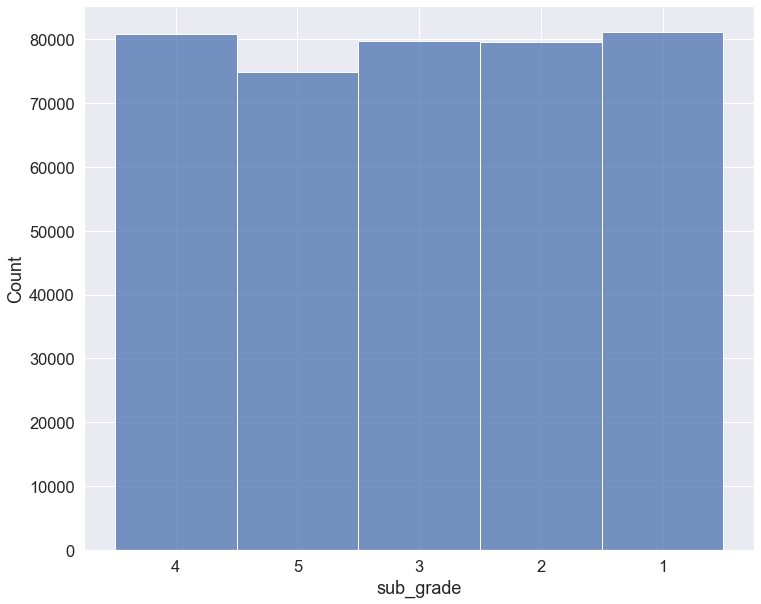

In [221]:
plt.figure(figsize=(12,10))
sns.histplot(data4.sub_grade)

### 4. address

In [222]:
data4.address.value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: address, dtype: int64

<AxesSubplot:xlabel='address', ylabel='Count'>

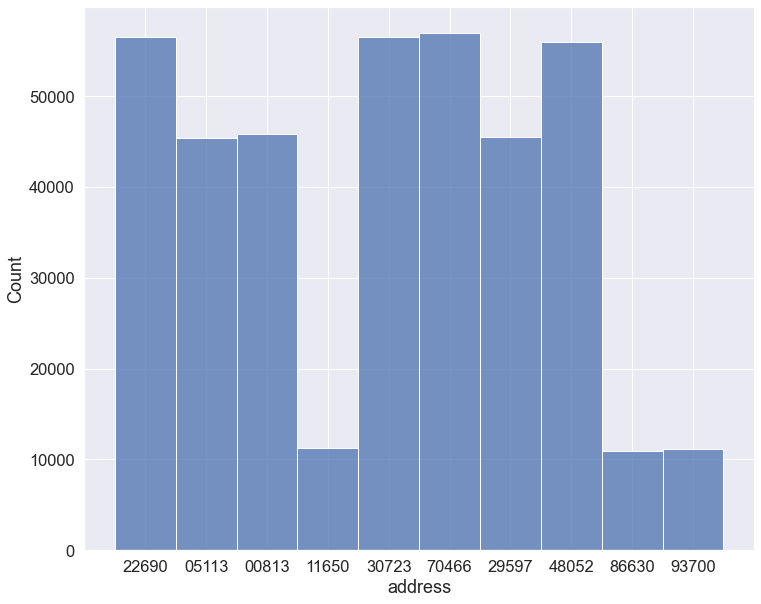

In [223]:
plt.figure(figsize=(12,10))
sns.histplot(data4.address)

## New Correlations

### 1. earliest_cr_line_month and earliest_cr_line_year

In [224]:
data4.corr().loan_status.abs().sort_values()[:-1]

earliest_cr_line_month    0.003861
pub_rec_bankruptcies      0.009383
revol_bal                 0.010892
total_acc                 0.017893
pub_rec                   0.019933
open_acc                  0.028012
earliest_cr_line_year     0.038928
installment               0.041082
annual_inc                0.053432
loan_amnt                 0.059836
dti                       0.062413
mort_acc                  0.073111
revol_util                0.082373
int_rate                  0.247758
Name: loan_status, dtype: float64

In [225]:
correl2=pd.DataFrame(data4.corr().loan_status.sort_values()[:-1]).reset_index()

In [226]:
correl2

,index,loan_status
0,int_rate,-0.247758
1,revol_util,-0.082373
2,dti,-0.062413
3,loan_amnt,-0.059836
4,installment,-0.041082
5,earliest_cr_line_year,-0.038928
6,open_acc,-0.028012
7,pub_rec,-0.019933
8,pub_rec_bankruptcies,-0.009383
9,earliest_cr_line_month,0.003861


<AxesSubplot:xlabel='loan_status', ylabel='index'>

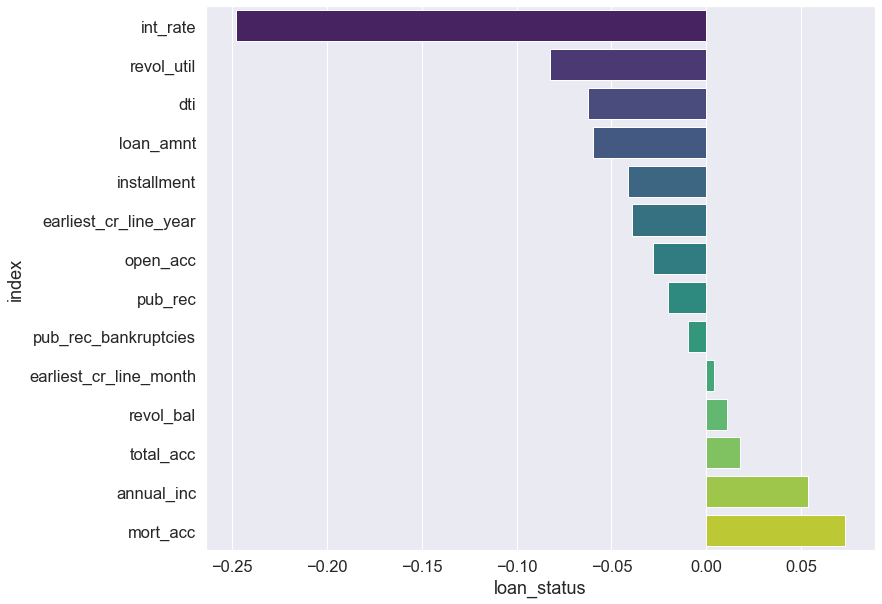

In [227]:
plt.figure(figsize=(12,10))
sns.barplot(y='index',x='loan_status',data=correl2,palette='viridis')

**Among new features, year-feature is negatively correlated with loan_status. Month-feature have negligible correlations**

### 2. sub_grade

#### Bivariate plot showing label ratios

<AxesSubplot:xlabel='sub_grade', ylabel='Count'>

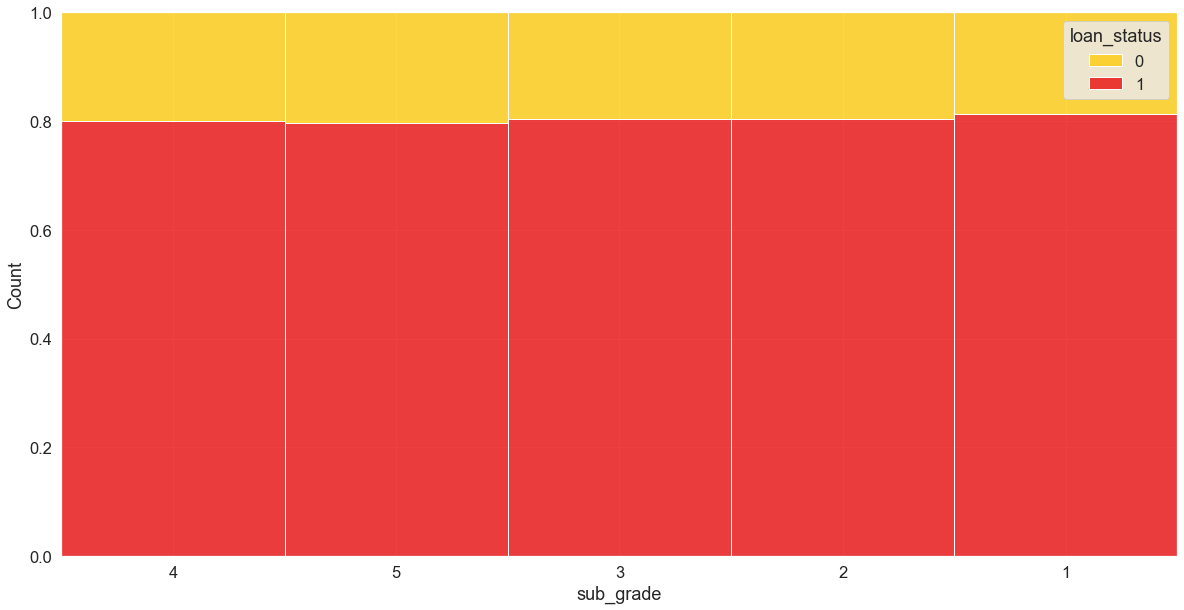

In [228]:
plt.figure(figsize=(20,10))
sns.histplot(data=data4,x='sub_grade',hue='loan_status',palette='hot_r',multiple='fill')

#### Target variable distribution in different sub_grade

In [229]:
sub_grade_df=data4.groupby('sub_grade').loan_status.mean()
sub_grade_df

sub_grade
1    0.813992
2    0.804611
3    0.803675
4    0.800319
5    0.796165
Name: loan_status, dtype: float64

**Label distribution is similar**

### 3. address

#### Bivariate plot showing label ratios

<AxesSubplot:xlabel='address', ylabel='Count'>

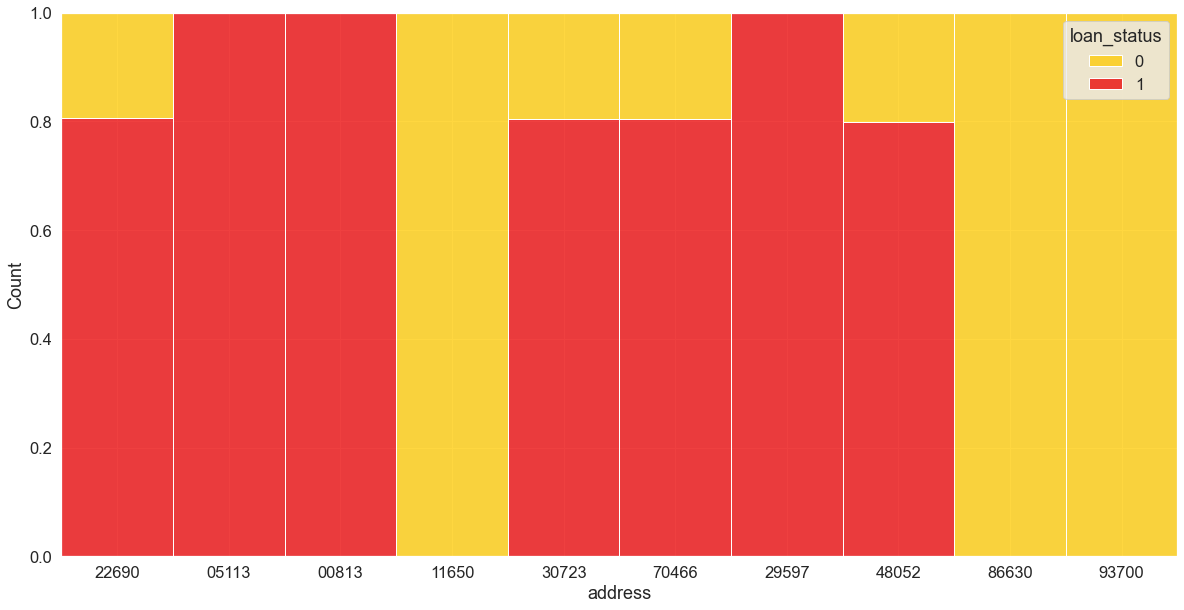

In [230]:
plt.figure(figsize=(20,10))
sns.histplot(data=data4,x='address',hue='loan_status',palette='hot_r',multiple='fill')

#### Target variable distribution in different address(zipcodes)

In [231]:
address_df=data4.groupby('address').loan_status.mean()
address_df

address
00813    1.000000
05113    1.000000
11650    0.000000
22690    0.806216
29597    1.000000
30723    0.805097
48052    0.799846
70466    0.804370
86630    0.000000
93700    0.000000
Name: loan_status, dtype: float64

**Label distribution is very different**

#### value_counts

In [232]:
data4.address.value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: address, dtype: int64

In [233]:
data4.address.value_counts(normalize=True)*100

70466    14.389061
30723    14.278211
22690    14.273414
48052    14.119385
00813    11.570841
29597    11.481706
05113    11.464283
11650     2.834634
93700     2.815696
86630     2.772770
Name: address, dtype: float64

**address(zipcodes) has very good correlation with label as seen from very different label distribution : Important feature**

# Feature Selection

## Features with null values

In [234]:
data4.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                 22927
emp_length                18301
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                      1755
dti                           0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                  276
total_acc                     0
initial_list_status           0
application_type              0
mort_acc                  37795
pub_rec_bankruptcies        535
address                       0
earliest_cr_line_month        0
earliest_cr_line_year         0
dtype: int64

## Categorical features: emp_title and title have too many unique values

In [235]:
data4.emp_title.describe()

count      373103
unique     173105
top       Teacher
freq         4389
Name: emp_title, dtype: object

In [236]:
data4.title.describe()

count                 394275
unique                 48817
top       Debt consolidation
freq                  152472
Name: title, dtype: object

## Data Leakage

### issue_d

In [237]:
info[info.LoanStatNew=='issue_d'].Description

11    The month which the loan was funded
Name: Description, dtype: object

In [238]:
data4.issue_d.describe()

count       396030
unique         115
top       Oct-2014
freq         14846
Name: issue_d, dtype: object

**Need to be removed to prevent data leakage(theoretically)**

## Numerical features with very less correlation to label

In [239]:
data4.corr().loan_status.abs().sort_values().head()

earliest_cr_line_month    0.003861
pub_rec_bankruptcies      0.009383
revol_bal                 0.010892
total_acc                 0.017893
pub_rec                   0.019933
Name: loan_status, dtype: float64

**earliest_cr_line_month: 0.003861 and pub_rec_bankruptcies: 0.009383 have very less correlation**

### 1. earliest_cr_line_month

In [240]:
data4.earliest_cr_line_month.describe()

count    396030.000000
mean          6.756231
std           3.435011
min           1.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          12.000000
Name: earliest_cr_line_month, dtype: float64

### 2. pub_rec_bankruptcies

In [241]:
data4.pub_rec_bankruptcies.describe()

count    395495.000000
mean          0.121648
std           0.356174
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: pub_rec_bankruptcies, dtype: float64

## Categorical features with very less correlation to label

In [242]:
cat_cols=data4.select_dtypes('object').drop(['emp_title','issue_d','title'],axis=1).columns
cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [243]:
cat_corr=pd.DataFrame(data=cat_cols,columns=['Feature'],)
cat_corr

,Feature
0,term
1,grade
2,sub_grade
3,emp_length
4,home_ownership
5,verification_status
6,purpose
7,initial_list_status
8,application_type
9,address


### Label distribution in each category

In [244]:
cat_corr['Label_dist']=cat_corr['Feature'].apply(lambda feat:[data4.groupby(feat).loan_status.mean()])
cat_corr

,Feature,Label_dist
0,term,"[[0.8422542673134551, 0.6805849508109545]]"
1,grade,"[[0.9371212239238476, 0.8742695099036356, 0.7881910045571626, 0.7113217051822933, 0.6263655995934959, 0.5721202854230377, 0.5216110019646365]]"
2,sub_grade,"[[0.8139916375790914, 0.8046112843206276, 0.8036753637732063, 0.8003191134089476, 0.7961651523249599]]"
3,emp_length,"[[0.8008654663472684, 0.8158139018255964, 0.8067379350768973, 0.8047686720353703, 0.8076152304609219, 0.807812794866956, 0.8108056235305408, 0.8052259954848936, 0.8002399833055092, 0.7995298419746637, 0.7931284475965327]]"
4,home_ownership,"[[1.0, 0.830439429689233, 0.7741935483870968, 0.8571428571428571, 0.7931966301065013, 0.773377558044934]]"
5,verification_status,"[[0.8536400121520282, 0.7852570689195875, 0.7767889770211303]]"
6,purpose,"[[0.8652331275282095, 0.8328816295064985, 0.7925861488143211, 0.8365758754863813, 0.8299209321681231, 0.8028169014084507, 0.8352673492605234, 0.7828884652049571, 0.7652417659425368, 0.787821571866887, 0.7659574468085106, 0.705490264865813, 0.8107667210440457, 0.8791390728476821]]"
7,initial_list_status,"[[0.8069400922433275, 0.7992453976855486]]"
8,application_type,"[[0.6433566433566433, 0.8039127894181661, 0.8729411764705882]]"
9,address,"[[1.0, 1.0, 0.0, 0.8062164983105419, 1.0, 0.8050967354012663, 0.7998462006187742, 0.804369570939721, 0.0, 0.0]]"


### Standard deviation of label distributions in each category

In [245]:
cat_corr['Std']=cat_corr['Label_dist'].apply(lambda dist:np.array(dist).std())
cat_corr[['Feature','Std']].sort_values('Std')

,Feature,Std
7,initial_list_status,0.003847
3,emp_length,0.005867
2,sub_grade,0.005915
5,verification_status,0.034406
6,purpose,0.043411
4,home_ownership,0.078446
0,term,0.080835
8,application_type,0.096178
1,grade,0.144246
9,address,0.414928


**initial_list_status, emp_length and sub_grade have least standard deviation in label distribution**

#### 1. initial_list_status

In [246]:
initial_list_status_df.values.std()

0.003847347278889468

#### 2. emp_length

In [247]:
emp_lengths_df.values.std()

0.005866562369941041

#### 3. sub_grade

In [248]:
sub_grade_df.values.std()

0.005915055149285235

## Dropping features

In [249]:
data5=data4.copy()

In [250]:
data5.drop(['emp_title','title','issue_d','earliest_cr_line_month','pub_rec_bankruptcies','initial_list_status','emp_length','sub_grade'],axis=1,inplace=True)

In [251]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              396030 non-null  float64
 1   term                   396030 non-null  object 
 2   int_rate               396030 non-null  float64
 3   installment            396030 non-null  float64
 4   grade                  396030 non-null  object 
 5   home_ownership         396030 non-null  object 
 6   annual_inc             396030 non-null  float64
 7   verification_status    396030 non-null  object 
 8   loan_status            396030 non-null  uint8  
 9   purpose                396030 non-null  object 
 10  dti                    396030 non-null  float64
 11  open_acc               396030 non-null  float64
 12  pub_rec                396030 non-null  float64
 13  revol_bal              396030 non-null  float64
 14  revol_util             395754 non-nu

# Data Cleaning

## Checking for nulls

In [252]:
data5.isnull()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,address,earliest_cr_line_year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

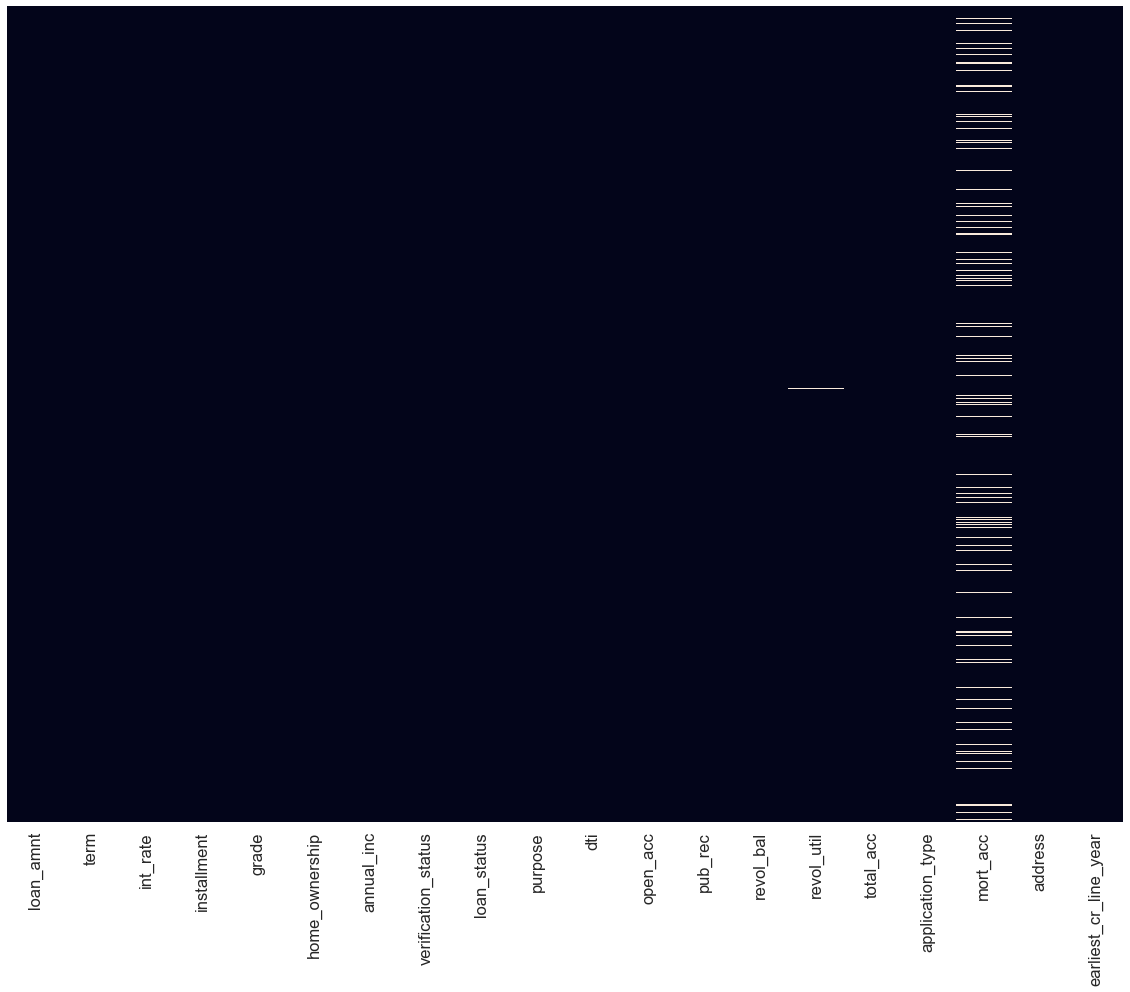

In [253]:
plt.figure(figsize=(20,15))
sns.heatmap(data5.isnull(),yticklabels=False, cbar=False)

In [254]:
data5.isnull().sum()

loan_amnt                    0
term                         0
int_rate                     0
installment                  0
grade                        0
home_ownership               0
annual_inc                   0
verification_status          0
loan_status                  0
purpose                      0
dti                          0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                 276
total_acc                    0
application_type             0
mort_acc                 37795
address                      0
earliest_cr_line_year        0
dtype: int64

In [255]:
nulls_now=data5.isna().sum()
nulls_now[nulls_now.values!=0]

revol_util      276
mort_acc      37795
dtype: int64

### Percentage missing

In [256]:
nulls_now[nulls_now.values!=0]/len(data5)*100

revol_util    0.069692
mort_acc      9.543469
dtype: float64

## Features with nulls

### 1. mort_acc : 37795 nulls

In [257]:
info[info.LoanStatNew=='mort_acc'].Description

26    Number of mortgage accounts.
Name: Description, dtype: object

In [258]:
data5.mort_acc.describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

In [259]:
data5.corr().mort_acc.sort_values()[:-1]

earliest_cr_line_year   -0.291298
int_rate                -0.082583
dti                     -0.025439
revol_util               0.007514
pub_rec                  0.011552
loan_status              0.073111
open_acc                 0.109205
installment              0.193694
revol_bal                0.194925
loan_amnt                0.222315
annual_inc               0.236320
total_acc                0.381072
Name: mort_acc, dtype: float64

**total_acc has highest correlation with mort_acc**

#### Filling mort_acc based on total_acc

In [260]:
data6=data5.copy()

In [261]:
nulls_now=data6.isna().sum()
nulls_now[nulls_now.values!=0]

revol_util      276
mort_acc      37795
dtype: int64

In [262]:
data6.groupby('total_acc').mort_acc.value_counts()

total_acc  mort_acc
2.0        0.0          16
3.0        0.0         165
           1.0           7
           2.0           1
4.0        0.0         815
                      ... 
124.0      1.0           1
129.0      1.0           1
135.0      3.0           1
150.0      2.0           1
151.0      0.0           1
Name: mort_acc, Length: 1243, dtype: int64

In [263]:
fill_df=data6.groupby('total_acc').mort_acc.mean()
fill_df

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**Function to fill missing values**

In [264]:
def fill_mort_acc(tot,mort):
    if np.isnan(mort)==True:
        mort=fill_df[tot]
    return mort

In [265]:
data6.mort_acc=data6.apply(lambda x:fill_mort_acc(x.total_acc,x.mort_acc),axis=1)

In [266]:
nulls_now=data6.isna().sum()
nulls_now[nulls_now.values!=0]

revol_util    276
dtype: int64

### 2. revol_util : 276 nulls

In [267]:
info[info.LoanStatNew=='revol_util'].Description

22    Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
Name: Description, dtype: object

In [268]:
data5.revol_util.describe()

count    395754.000000
mean         53.791749
std          24.452193
min           0.000000
25%          35.800000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64

#### Percentage missing

In [269]:
nulls_now[nulls_now.values!=0]/len(data5)*100

revol_util    0.069692
dtype: float64

**Less than 0.1 percentage of values missing**

#### Dropping rows with missing values

In [270]:
data7=data6.copy()

In [271]:
data7.dropna(inplace=True)

In [272]:
nulls_now=data7.isna().sum()
nulls_now[nulls_now.values!=0]

Series([], dtype: int64)

**No more null values**

## home_ownership has columns with very few entries

In [273]:
info[info.LoanStatNew=='home_ownership'].Description

8    The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
Name: Description, dtype: object

In [274]:
data7.home_ownership.describe()

count       395754
unique           6
top       MORTGAGE
freq        198219
Name: home_ownership, dtype: object

In [275]:
data7.home_ownership.value_counts()

MORTGAGE    198219
RENT        159677
OWN          37714
OTHER          110
NONE            31
ANY              3
Name: home_ownership, dtype: int64

### Replacing 'NONE' and 'ANY' values with 'OTHER'

In [276]:
data8=data7.copy()

In [277]:
data8.home_ownership.replace(['NONE','ANY'],'OTHER',inplace=True)

In [278]:
data8.home_ownership.value_counts()

MORTGAGE    198219
RENT        159677
OWN          37714
OTHER          144
Name: home_ownership, dtype: int64

# Data Encoding

## Remaining Categorical Features

In [279]:
data8.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395754 entries, 0 to 396029
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 395754 non-null  object
 1   grade                395754 non-null  object
 2   home_ownership       395754 non-null  object
 3   verification_status  395754 non-null  object
 4   purpose              395754 non-null  object
 5   application_type     395754 non-null  object
 6   address              395754 non-null  object
dtypes: object(7)
memory usage: 24.2+ MB


**term has numerical data : can be converted to numerical feature**

### Converting term to int

In [280]:
data8.term.value_counts()

 36 months    301782
 60 months     93972
Name: term, dtype: int64

In [281]:
data9=data8.copy()

In [282]:
data9.term.iloc[0][:3]

' 36'

In [283]:
data9.term=data9.term.apply(lambda x:int(x[1:3]))

In [284]:
data9.term.value_counts()

36    301782
60     93972
Name: term, dtype: int64

### Remaining Categorical Features

In [285]:
data9.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395754 entries, 0 to 396029
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   grade                395754 non-null  object
 1   home_ownership       395754 non-null  object
 2   verification_status  395754 non-null  object
 3   purpose              395754 non-null  object
 4   application_type     395754 non-null  object
 5   address              395754 non-null  object
dtypes: object(6)
memory usage: 21.1+ MB


## Dummy Encoding

In [286]:
data9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395754 entries, 0 to 396029
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              395754 non-null  float64
 1   term                   395754 non-null  int64  
 2   int_rate               395754 non-null  float64
 3   installment            395754 non-null  float64
 4   grade                  395754 non-null  object 
 5   home_ownership         395754 non-null  object 
 6   annual_inc             395754 non-null  float64
 7   verification_status    395754 non-null  object 
 8   loan_status            395754 non-null  uint8  
 9   purpose                395754 non-null  object 
 10  dti                    395754 non-null  float64
 11  open_acc               395754 non-null  float64
 12  pub_rec                395754 non-null  float64
 13  revol_bal              395754 non-null  float64
 14  revol_util             395754 non-nu

In [287]:
data10=data9.copy()

In [288]:
data10.select_dtypes('object')

,grade,home_ownership,verification_status,purpose,application_type,address
0,B,RENT,Not Verified,vacation,INDIVIDUAL,22690
1,B,MORTGAGE,Not Verified,debt_consolidation,INDIVIDUAL,05113
2,B,RENT,Source Verified,credit_card,INDIVIDUAL,05113
3,A,RENT,Not Verified,credit_card,INDIVIDUAL,00813
4,C,MORTGAGE,Verified,credit_card,INDIVIDUAL,11650
...,...,...,...,...,...,...
396025,B,RENT,Source Verified,debt_consolidation,INDIVIDUAL,30723
396026,C,MORTGAGE,Source Verified,debt_consolidation,INDIVIDUAL,05113
396027,B,RENT,Verified,debt_consolidation,INDIVIDUAL,70466
396028,C,MORTGAGE,Verified,debt_consolidation,INDIVIDUAL,29597


In [289]:
dummies=pd.get_dummies(data10.select_dtypes('object'),drop_first=True)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395754 entries, 0 to 396029
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   grade_B                              395754 non-null  uint8
 1   grade_C                              395754 non-null  uint8
 2   grade_D                              395754 non-null  uint8
 3   grade_E                              395754 non-null  uint8
 4   grade_F                              395754 non-null  uint8
 5   grade_G                              395754 non-null  uint8
 6   home_ownership_OTHER                 395754 non-null  uint8
 7   home_ownership_OWN                   395754 non-null  uint8
 8   home_ownership_RENT                  395754 non-null  uint8
 9   verification_status_Source Verified  395754 non-null  uint8
 10  verification_status_Verified         395754 non-null  uint8
 11  purpose_credit_card                  39

## Removing original features

In [290]:
data10.drop(data10.select_dtypes('object').columns.to_list(),axis=1,inplace=True)
data10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395754 entries, 0 to 396029
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              395754 non-null  float64
 1   term                   395754 non-null  int64  
 2   int_rate               395754 non-null  float64
 3   installment            395754 non-null  float64
 4   annual_inc             395754 non-null  float64
 5   loan_status            395754 non-null  uint8  
 6   dti                    395754 non-null  float64
 7   open_acc               395754 non-null  float64
 8   pub_rec                395754 non-null  float64
 9   revol_bal              395754 non-null  float64
 10  revol_util             395754 non-null  float64
 11  total_acc              395754 non-null  float64
 12  mort_acc               395754 non-null  float64
 13  earliest_cr_line_year  395754 non-null  int64  
dtypes: float64(11), int64(2), uint8(1)
m

## Adding dummies

In [291]:
data11=data10.copy()

In [292]:
data11=pd.concat([data11,dummies],axis=1)
data11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395754 entries, 0 to 396029
Data columns (total 49 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395754 non-null  float64
 1   term                                 395754 non-null  int64  
 2   int_rate                             395754 non-null  float64
 3   installment                          395754 non-null  float64
 4   annual_inc                           395754 non-null  float64
 5   loan_status                          395754 non-null  uint8  
 6   dti                                  395754 non-null  float64
 7   open_acc                             395754 non-null  float64
 8   pub_rec                              395754 non-null  float64
 9   revol_bal                            395754 non-null  float64
 10  revol_util                           395754 non-null  float64
 11  total_acc    

# Data Splitting

In [293]:
X=data11.drop('loan_status',axis=1).values
y=data11.loan_status.values

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Data Normalization

In [295]:
scaler=MinMaxScaler()

In [296]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Deep learning Model

In [298]:
model=Sequential()